# Single Pulse Jitter analysis 

# Introduction

The pulse signals from pulsars recieved by a radio telesope are saved as time series. It becomes an important exercise to understand characteristics of the pulse signals for furthur study and applications. 

Here we analyse and study the time of arrivals of a pulse signal to find any correlation of certain factors like frequency dependence for a specific pulsar and come up with possible explanation of the results obtained.

# Mathematical modelling

Time of arrivals (TOA) of pulse signals can be modelled by ideal expected TOA with a noise. The noise in this case depends on several phenomenon such as interstellar scintillations etc. But here in our analysis we consider only two parameters causing the Observed TOAs to deviate from expected TOAs, because we are integrating over longer time scales at which other phenomenons do not have significant contributions in the deviations.

We look at the residuals of the Observed TOAs and the Expected TOAs and call it Timing residuals $T_{res}$.

Now $T_{res}$ can be modelled as a random variable which is sum of two other random variables, one related to Radiometer noise let's call it $R$. Note that Radiometer noise is white in nature, so it spans equally over all frequencies and time. The other source of timing noise is intrinsit to the pulsar caused by change in the shape of the pulse, let's call it Jitter, $J_{\nu}$. We cannot assume this Jitter to be a white noise so it may be dependent on the frequency of the observation. The frequency dependence of jitter is captured by subsctript $\nu$. However we can assume Jitter to be present at all times during the observation.

so, $$T_{res} = R + J_{\nu}$$

To move forward we keep our faith in Central Limit Theorem and take the both the random variables to be Gaussian.
$$ R = \mathcal{N}(0,\sigma_{rad}^2)  \space, and \space  J_{\nu} =  \mathcal{N}(0,\sigma_J^2(\nu) )$$

And since $R$ and $J_{\nu}$ are independent random variables, $$T_{res} = \mathcal{N}(0,\sigma_{rad}^2+\sigma_J^2(\nu))$$

Note that both Radiometer noise and Jitter noise, i.e. $\sigma_{rad}$ and $\sigma_{J}(\nu)$ , when calculated from time integrated data will show $1/\sqrt{n}$ dependence, where n is the number of subints or time of observation. 

Thus one can scale the standard deviations as, $$ \sigma(T_1) = \sigma(T_2) \sqrt{\frac{T_2}{T_1} }$$

## Estimators

We desctribed above the mathematical relation between the observed parameter ($T_{res}$) and the parameter which we wish to estimate $\sigma_{J}(\nu) $. In this section we will descibe how do we estimate the Jitter from the sampled data.

Tempo2 returns us two numbers, one is the timing residual and the other is error bar on the corresponding TOA. The TOA error bar gives us the measure of radiometer noise i.e. off-pulse rms, which is independent from the changes in the pulse shape. And the residuals however are because of the changes in pulse shape as well as the radiometer noise.

Let $ \space T_{res\space 1} ,\space    T_{res\space 2} \space , T_{res\space 3} \space, . . ... ,T_{res\space n} \space$ denote the sampled values for the same integration time. We know that they are sampled from $\space  \mathcal{N}(0,\sigma_{rad}^2+\sigma_J^2(\nu))$.
Note that these sampled values are the timing residuals, obtained by collapsing the whole observation into $n$ subints.

Also let corresponding TOA error bars be denoted by $ \space T_{error\space 1} ,\space    T_{error\space 2} \space , T_{error\space 3} \space, . . ... ,T_{error\space n} \space$ . Which we suppose is the sampled standard deviation of the $R$ random variable. i.e. $ \space T_{error\space,i} \space = s_{rad \space,i} \space$   where s denotes the sample standard deviation because of rms value corresponding to off-pulse region.

Thus, Now we can create a confidence interval for $\space \sigma^2 = \sigma_{rad}^2+\sigma_J^2(\nu)$ .

One can show with a simple mathematical exercise that if n points are sampled from Normal distribution with a known mean, the confidence interval for $\sigma^2$ is given by 

$$ \sigma^2 \in [ \frac{n W_n}{\chi^{2}_{n} (\frac{\alpha} {2})   }  ,      \frac{n W_n}{\chi^{2}_{n} (1- \frac{\alpha}{2})   } ]  $$

where, $$ W_n = \frac{1}{n} \sum_{i=1} ^n {(x_i - \mu)^2 } \space  $$ and  $$ \space  \chi^{2}_{n} (\frac{\alpha} {2}) $$  denotes the $1 - \frac{\alpha}{2} $ quantile of the $\chi^2 $ distribution with n degrees of freedom. 

Using the above result, we get $$ \sigma_{rad}^2 + \sigma_{J}^2(\nu) \in [ \frac{n W_n}{\chi^{2}_{n} (\frac{\alpha} {2})   }  ,      \frac{n W_n}{\chi^{2}_{n} (1- \frac{\alpha}{2})   } ]  $$

Here, $$ W_n = \frac{1}{n} \sum_{i=1} ^n {(T_{res \space i } - \mu)^2 } \space  $$ and $\mu$ = 0

In order give bounds on $\sigma_{J}^2(\nu) $ we need an estimator of $\sigma_{rad}^2 $

As stated above $ \space T_{error\space,i} \space = s_{rad \space,i} \space$, thus we can guess following estimator for $\sigma_{rad}^2 \space $ as  $$\space \hat{\sigma}_{rad}^2 = mean{({s}_{rad}^{2})} \space = \frac{1}{n} \sum_{i=1}^{n}{T_{error\space,i}^2} $$



so, $$  \sigma_{J}^2(\nu) \in [ \frac{n W_n}{\chi^{2}_{n} (\frac{\alpha} {2})   } - \hat{\sigma}_{rad}^2   ,      \frac{n W_n}{\chi^{2}_{n} (1- \frac{\alpha}{2})   } -\hat{\sigma}_{rad}^2  ]  $$

We need to take care of special case when, $\space  \frac{n W_n}{\chi^{2}_{n}(\frac{\alpha}{2})} < \hat{\sigma}_{rad}^2  \space $. This case arrises when, $\sigma_{rad} > \sigma_{J}(\nu) $ and it does not make much sense to find confidence interval for $\sigma_{J}^2(\nu) $ using an estimator of other dominating quantity.

But even if we wish to carry out this exercise, we may cleverly chose to divide our $\chi^2_n $ intervals into ($\alpha-\beta$ , $1-\alpha$ , $\beta $) instead of ($\frac{\alpha}{2} , 1-\alpha , \frac{\alpha}{2} $)

 $$  \sigma_{J}^2(\nu) \in [ \frac{n W_n}{\chi^{2}_{n} ({\beta} )   } - \hat{\sigma}_{rad}^2   ,      \frac{n W_n}{\chi^{2}_{n} (1- \alpha + \beta)   } -\hat{\sigma}_{rad}^2  ]  $$

## Example plots

In this section we will describte the quantities mentioned in the previous sections through some plots, just for clearification.

# Jitter Variation with time

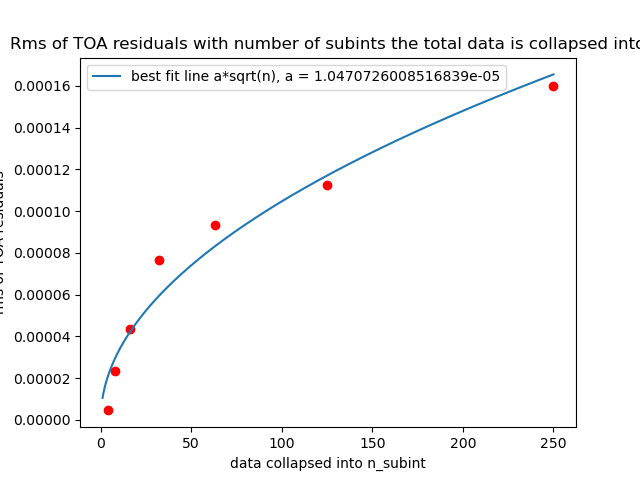

The above graph plots rms of TOA residuals vs number of subints the data is collapsed into. 
Since we can estimate $(\sigma_{J}^2 + \sigma_{rad}^2)$ from TOA residuals, it verifies that both radiometer noise and Jitter follow $\frac{1}{\sqrt{T}}$ dependence, where T is the integration time.

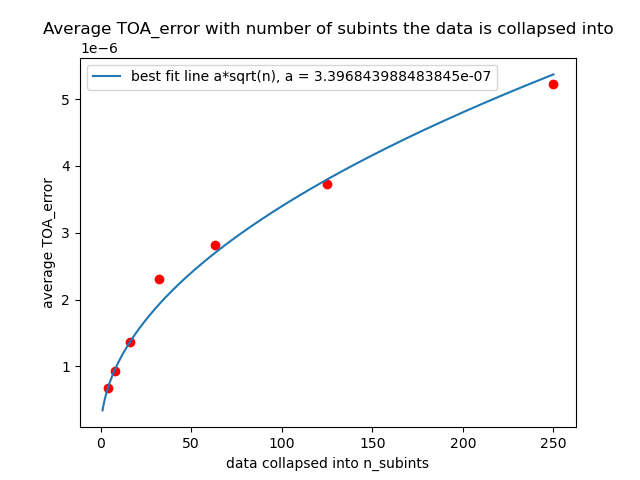

The above graph plots average TOA error vs number of subints the total data is collapsed into.
Average of TOA error gives us an estimate of $\sigma_{rad}$, so it verifies that radiometer noise also follows $\frac{1}{\sqrt{T}}$ dependence, where T is the integration time.

# Jitter Variation with frequency

### Plots

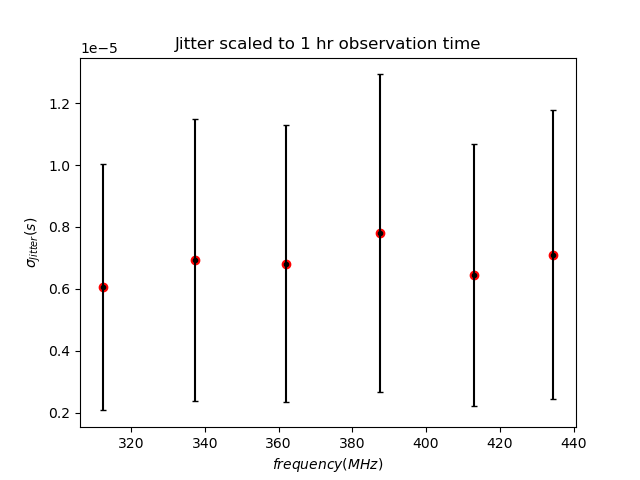

In [31]:
print("Average value over all the channels =", J08)

Average value over all the channels = (2.3433316816602246e-06, 1.1367166600050536e-05)


In [1]:
(2.3433316816602246e-06+1.1367166600050536e-05)/2

6.8552491408553804e-06

In [3]:
-(2.3433316816602246e-06-1.1367166600050536e-05)/2

4.511917459195155e-06

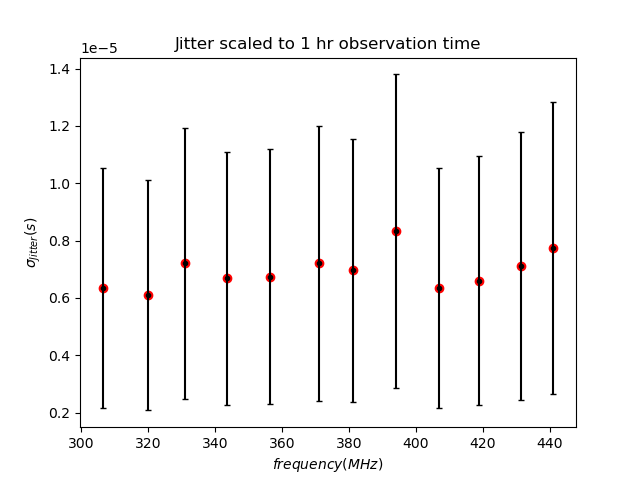

In [32]:
print("Average value over all the channels =", J16)

Average value over all the channels = (2.3686263184113997e-06, 1.1525029512399845e-05)


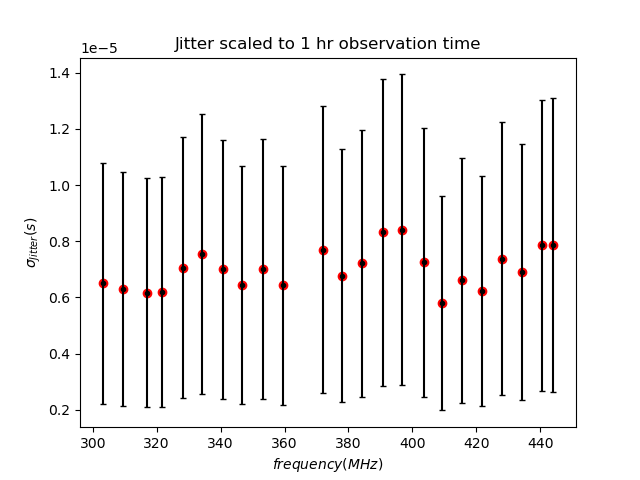

In [33]:
print("Average value over all the channels =", J32)

Average value over all the channels = (2.1931239915144816e-06, 1.1373934692788155e-05)


### Explanation

As stated above we modelled Jitter as a Normal random variable.$$J_{\nu}=\mathcal{N}(0,\sigma_{J}^2(\nu))$$

Let's denote the Jitter in 'n' subbands as $J_{\nu1} , J_{\nu2} ,J_{\nu3} , J_{\nu4} , .... J_{\nu n}$.

The observed time of arrival of the pulses after collapsing two consecutive subbands is the average of individual TOA before collapsing. Hence one can follow the extension that residuals are also averaged out during collapsing process.

so, 
$$T_{res \space i} = R_{i} + J_{\nu_i} $$ , where i denotes the i$^{th}$ frequency channel.

Note that $R$ is white in nature so one can drop the subscript i.

we restate th assumption we made before,
$$ R = \mathcal{N}(0,\sigma_{rad}^2) \space \space and \space \space J_{\nu_i} = \mathcal{N}(0,\sigma_{J}^2(\nu_{i})) $$

Now suppose we collapse 'm' consecutive channels to form n/m channels on which we perform jitter analysis.

$$ T'_{res \space j} = \frac{1}{m} \sum_{i= {mj - m +1} } ^{ mj } T_{res \space i} \space \space  = \mathcal{N}(0,\frac{\sigma_{rad}^2}{m}) \space  +  \frac{1}{m} \sum_{i= {mj - m +1} } ^{ mj } J_{\nu_i} $$
j = 1, 2, 3 ... n/m

If $J_{\nu_i}$ were independent normals then the sum will also be a normal with variance scaled by a factor of $\frac{1}{m}$.
$$ T'_{res \space j} =  \mathcal{N}(0,\frac{\sigma_{rad}^2}{m}) + \mathcal{N}(0,\frac{\sigma_{J}^2 (\nu)}{m}) \space \space = \mathcal{N}(0,\frac{\sigma_{rad}^2 }{m} + \frac{1}{m^2}\sum \sigma_{J}^{2}(\nu) )  $$
now if we assume that the variance of the independent $J_{\nu_i}$ are same, we get
$$ T'_{res \space j} = \mathcal{N}(0,\frac{\sigma_{rad}^2 + \sigma_{J}^{2}}{m} )  $$


So, if $J_{\nu_i}$ are were independent random varibles the observed rms of the should decrease as $\frac{1}{m}$ , where m is the number of collapsed channels. This statement is infact even true if $J_{\nu_i}$ were not identically distributed i.e. $\sigma_{J}^2(\nu)$ were different.

But we don't see any significant decrease in the value thus $J_{\nu_i}$ are not independent, hence are correlated.

### Examples supporting the explanation.

#### Why Jitter doesn't change when increasing the subbands ?

Let's look at the time of arrivals generated by 'pat':

In [3]:
df1 = pd.read_csv('../Analysis4.1/10_8_rfi_files/10_16_rfi.0008_0000.txt', sep='\s+', header=None)
df2 = pd.read_csv('../Analysis4.1/10_8_rfi_files/10_16_rfi.0009_0000.txt', sep='\s+', header=None)
df3 = pd.read_csv('../Analysis4.1/10_8_rfi_files/10_8_rfi.0004_0000.txt', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_9967/3111403389.py:1: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_csv('../Analysis4.1/10_8_rfi_files/10_16_rfi.0008_0000.txt', sep='\s+', header=None)
/tmp/ipykernel_9967/3111403389.py:2: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv('../Analysis4.1/10_8_rfi_files/10_16_rfi.0009_0000.txt', sep='\s+', header=None)
/tmp/ipykernel_9967/3111403389.py:3: SyntaxWarning: invalid escape sequence '\s'
  df3 = pd.read_csv('../Analysis4.1/10_8_rfi_files/10_8_rfi.0004_0000.txt', sep='\s+', header=None)


In [4]:
df1

,0,1,2,3,4
0,10_16_rfi.0008_0000,394.111,59064.715212,1.384,gmrt
1,10_16_rfi.0008_0000,394.111,59064.717532,1.069,gmrt
2,10_16_rfi.0008_0000,394.111,59064.719839,1.544,gmrt
3,10_16_rfi.0008_0000,394.111,59064.722159,1.159,gmrt
4,10_16_rfi.0008_0000,394.111,59064.724475,1.481,gmrt
5,10_16_rfi.0008_0000,394.111,59064.726786,0.977,gmrt
6,10_16_rfi.0008_0000,394.111,59064.729101,0.921,gmrt
7,10_16_rfi.0008_0000,394.111,59064.731417,1.089,gmrt
8,10_16_rfi.0008_0000,394.111,59064.733728,1.737,gmrt
9,10_16_rfi.0008_0000,394.111,59064.736048,2.459,gmrt


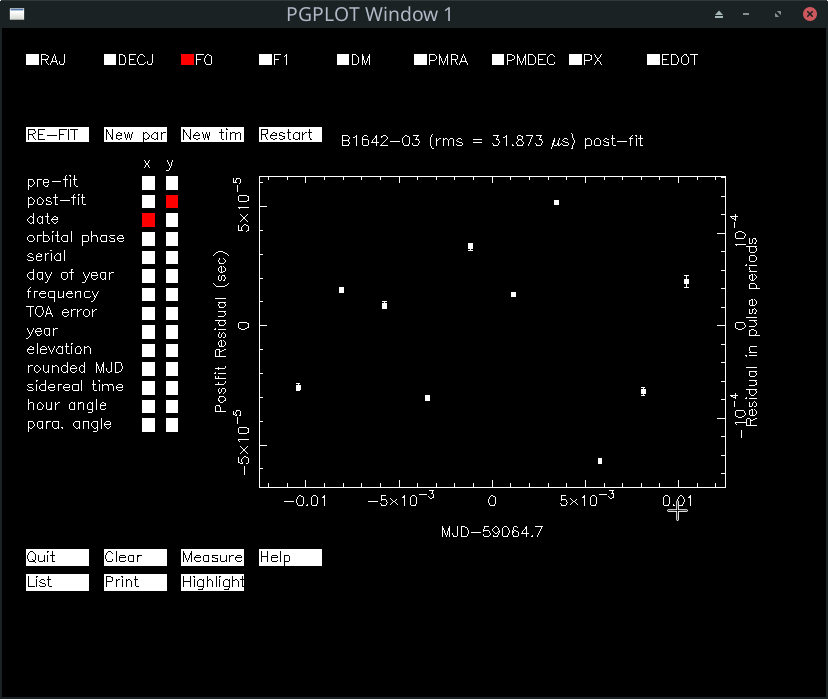

In [5]:
df2

,0,1,2,3,4
0,10_16_rfi.0009_0000,381.078,59064.715213,1.749,gmrt
1,10_16_rfi.0009_0000,381.078,59064.717533,1.775,gmrt
2,10_16_rfi.0009_0000,381.078,59064.719840,2.415,gmrt
3,10_16_rfi.0009_0000,381.078,59064.722160,1.577,gmrt
4,10_16_rfi.0009_0000,381.078,59064.724475,1.651,gmrt
5,10_16_rfi.0009_0000,381.078,59064.726786,1.491,gmrt
6,10_16_rfi.0009_0000,381.078,59064.729102,1.235,gmrt
7,10_16_rfi.0009_0000,381.078,59064.731418,1.728,gmrt
8,10_16_rfi.0009_0000,381.078,59064.733729,2.076,gmrt
9,10_16_rfi.0009_0000,381.078,59064.736049,2.119,gmrt


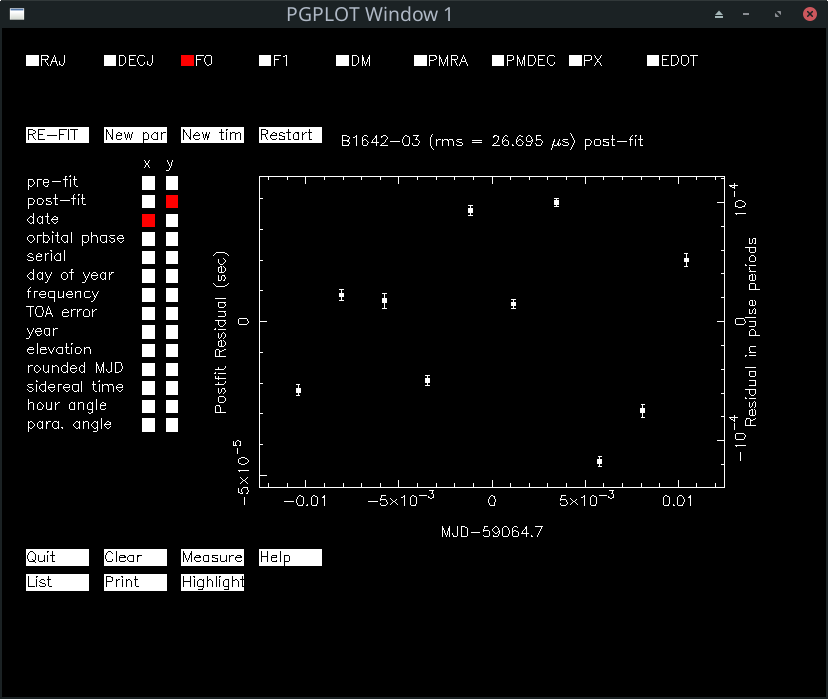

In [6]:
df3

,0,1,2,3,4
0,10_8_rfi.0004_0000,387.488,59064.715213,1.391,gmrt
1,10_8_rfi.0004_0000,387.488,59064.717533,1.101,gmrt
2,10_8_rfi.0004_0000,387.488,59064.719839,1.702,gmrt
3,10_8_rfi.0004_0000,387.488,59064.722159,1.068,gmrt
4,10_8_rfi.0004_0000,387.488,59064.724475,1.412,gmrt
5,10_8_rfi.0004_0000,387.488,59064.726786,1.052,gmrt
6,10_8_rfi.0004_0000,387.488,59064.729102,0.810,gmrt
7,10_8_rfi.0004_0000,387.488,59064.731417,1.186,gmrt
8,10_8_rfi.0004_0000,387.488,59064.733728,1.740,gmrt
9,10_8_rfi.0004_0000,387.488,59064.736048,2.178,gmrt


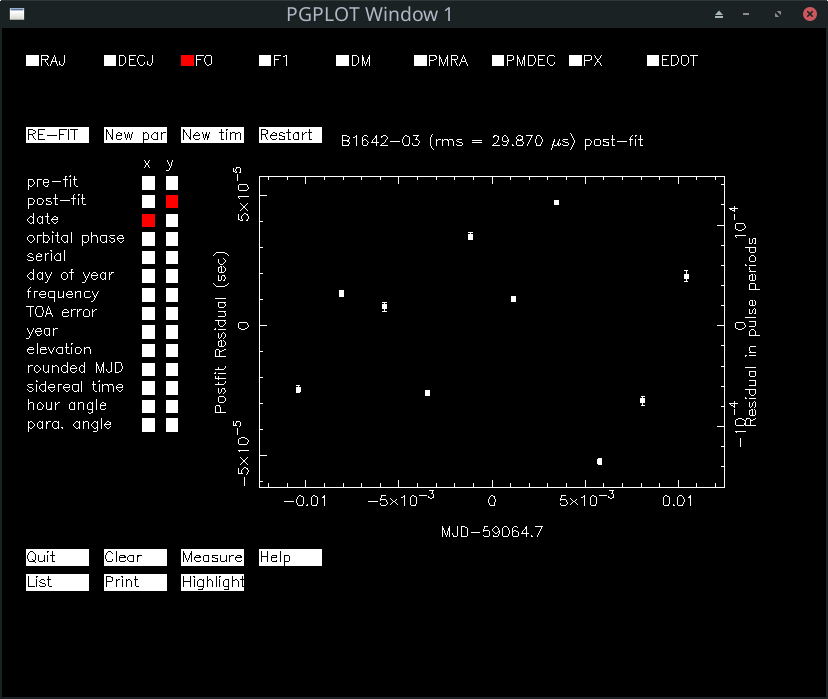

In [18]:
l1=(0*df1.iloc[:,2]+df2.iloc[:,2])/2

In [19]:
l2=df3.iloc[:,2]

In [22]:
correlation_matrix=np.corrcoef(l1,l2)

In [23]:
correlation_matrix[0,1]

1.0

Also one can see a similar averaging effect in the TOA residuals through visual inspection of the plots above.

Thus the above data supports the argument that TOA drift because of Jitter is correlated in the adjoining frequency channels. That is why we don't see any change in the jitter number as we increase the number of subbands in which data is collapsed.

#### TOA_error is a measure of radiometer noise which should decrease as $\frac{1}{\sqrt{n}}$ as we collapse the subbads

### Result

We stated that the Jitter observed in different frequency channels is not independent random variable but is correlated.
The observed value of jitter being same over different frequency chanels even after collapsing suggests that the pulse shape changes (because of which jitter is observed) occur almost the same way for adjoining channels, hence still remain the same after collapsing a few channels.
Moreover no general trend (increasing or decreasing) was observed over different frequency channels. So the Jitter behaves same for all the frequencies for the pulsar we considered. 

# Appendix 1 : Python code

Purpose of the analysis is to find charateristics of jitter:
1. Its dependence on time.
   One expects Jitter to decrease by $\sqrt{N}$, as we increse the number of subints i.e. the integration time.
   We will find Jitter by collapsing the whole data into 10, 40, 160, 500 subints and check the dependence on N, And verify the expected trend.
2. Dependence on frequency.
   We will plot Jitter as a function frequency into 8, 16, 32, 64, 128.
   And check whats the trend.
3. We will also repeat the analysis in point 2. for different timing algoriths available with pat.   

Let us look at the plot of residuals that we obtain in tempo2 after fitting in for f_0

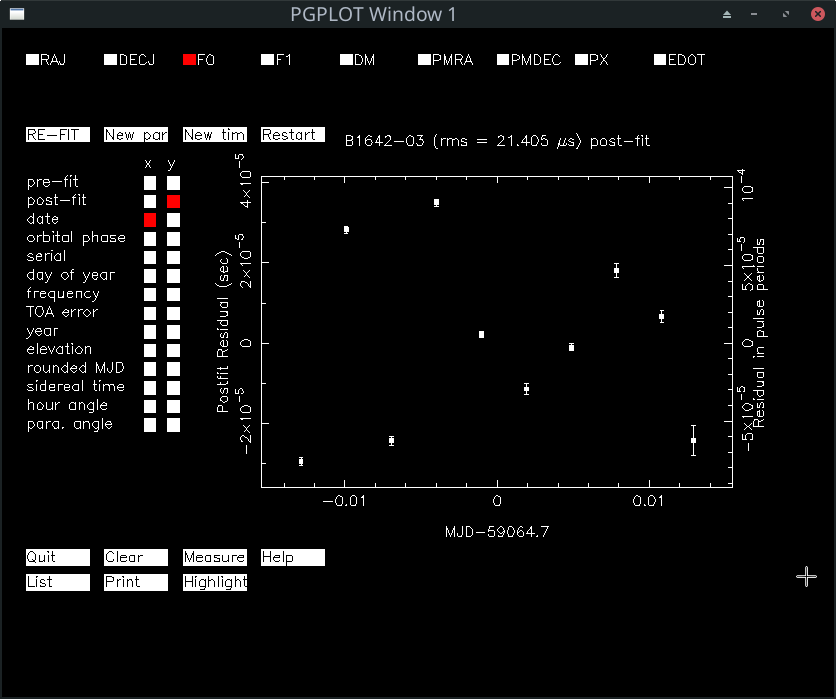

The numerical values are stored in the dataframe below.

Here we summarize the steps followed for obtaining the TOA residuals and TOA errors:
1. Clean the data from any RFI's if present.
2. Prepare required frequency crunched and time crunched PSRfits files.
3. Prepare smooth template profile, by maintaining the number of required frequency bands.
4. Split the PSR fits files into the subchannels for fitting in tempo2.
5. Obtain .tim files for all frequency channels using template and other files obtained in step 5.
6. Now run tempo2 for different .tim filesa corresponding to different frequency channels. Remove any outliers, remember to remove same subints in the other channels as well in order to maintian uniformity in the analysis.
7. Obtain the timing residuals and TOA_error by pressint the list option in the tempo2 GUI, numbers in three columns will be printed in the terminal window. Copy all and create a txt file containing the three numbers for all frequency channels. Please note the order in which the frequency channels are ru through this text file. Preffereably run last channel first i.e. in reverse order.
8. After obtaining the text file it is given as an input to the following code.

In [1]:
import numpy as np
from scipy.stats import chi2
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import psrchive
import os
import subprocess

## Making .tim files

1. Input number of channels
2. Path to template profile
3. psrsplit command
4. pat command on the split files
5. path to .tim folder

In [10]:
os.chdir('../Analysis4.1/10_8_rfi_files/')

In [11]:
os.mkdir('COF_tim_files')

In [12]:
os.chdir('../')

In [13]:
!ls

 10_128_rfi	      1_8_rfi.sm
 10_128_rfi_COF.tim   2_1_rfi
 10_128_rfi_files     2_1_rfi_COF.tim
 10_128_rfi_PGS.tim   2_1_rfi_FDM.tim
 10_128_rfi.tim       2_1_rfi_files
 10_16_rfi	      2_1_rfi_GIS.tim
 10_16_rfi_COF.tim    2_1_rfi_PGS.tim
 10_16_rfi_files      2_1_rfi_SIS.tim
 10_16_rfi_PGS.tim   '|250|125|63|32|16|8|4|2_1_COF_tim.txt'
 10_16_rfi.png	     '|250|125|63|32|16|8|4|2_1_GIS_tim.txt'
 10_16_rfi.tim	      250_1_rfi
 10_2_rfi	      250_1_rfi_COF.tim
 10_2_rfi_COF.tim     250_1_rfi_FDM.tim
 10_2_rfi_files       250_1_rfi_files
 10_2_rfi_PGS.tim     250_1_rfi_GIS.tim
 10_32_rfi	      250_1_rfi_PGS.tim
 10_32_rfi_COF.tim    250_1_rfi_SIS.tim
 10_32_rfi_files      256_1_rfi
 10_32_rfi_PGS.tim    32_1_rfi
 10_32_rfi.png	      32_1_rfi_COF.tim
 10_32_rfi.tim	      32_1_rfi_FDM.tim
 10_4_rfi	      32_1_rfi_files
 10_4_rfi_COF.tim     32_1_rfi_GIS.tim
 10_4_rfi_PGS.tim     32_1_rfi_PGS.tim
 10_4_rfi.tim	      32_1_rfi_SIS.tim
 10_512_rfi	      4_1_rfi
 10_64_rfi	      4_1_rfi_COF.t

In [14]:
!pam --setnchn {channels} -e tt 10_512_rfi
!mv 10_512_rfi.tt 10_{channels}_rfi

That is not a valid number of channels
mv: cannot stat '10_512_rfi.tt': No such file or directory


In [23]:
os.makedirs('10_128_rfi_cleaned',exist_ok=True)

In [49]:
channels=32

In [34]:
#!mv 10_{channels}_rfi_cleaned 10_{channels}_rfi_files
!mkdir 10_{channels}_rfi_files/tim_files

In [15]:
channels = 8

In [ ]:
## Splitting the files
!psrsplit -c 1 1_{channels}_rfi.sm -O 10_{channels}_rfi_files/template/

In [145]:
os.chdir("/home/ega-ninja/Projects/NIUS_Jitter_Project/Analysis/Analysis4.1/")

In [146]:
## pat command 
channels=32
algorith = 'SIS'
format='tempo2'
subint=10
for a in range(channels):
    i=str(a)
    if len(i)==1:
        i='000'+i
    elif len(i)==2:
        i='00'+i
    elif len(i)==3:
        i='0'+i
    k='1_'+str(channels)+'_rfi.'+i+'_0000.sm'
    kf='10_'+ str(channels)+'_rfi.' + i + '_0000'
    tim=i+'.tim'
    !pat -s 10_{channels}_rfi_files/template/{k} -f {format} -A {algorith} 10_{channels}_rfi_files/{kf} > 10_{channels}_rfi_files/{algorith}_tim_files/{algorith}_{subint}_{channels}_{tim}

Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2

In [7]:
%ls 10_32_rfi_files/

10_32_rfi.0000_0000  10_32_rfi.0012_0000  10_32_rfi.0024_0000
10_32_rfi.0001_0000  10_32_rfi.0013_0000  10_32_rfi.0025_0000
10_32_rfi.0002_0000  10_32_rfi.0014_0000  10_32_rfi.0026_0000
10_32_rfi.0003_0000  10_32_rfi.0015_0000  10_32_rfi.0027_0000
10_32_rfi.0004_0000  10_32_rfi.0016_0000  10_32_rfi.0028_0000
10_32_rfi.0005_0000  10_32_rfi.0017_0000  10_32_rfi.0029_0000
10_32_rfi.0006_0000  10_32_rfi.0018_0000  10_32_rfi.0030_0000
10_32_rfi.0007_0000  10_32_rfi.0019_0000  10_32_rfi.0031_0000
10_32_rfi.0008_0000  10_32_rfi.0020_0000  template/
10_32_rfi.0009_0000  10_32_rfi.0021_0000  tim_files/
10_32_rfi.0010_0000  10_32_rfi.0022_0000
10_32_rfi.0011_0000  10_32_rfi.0023_0000


In [33]:
os.chdir('/home/ega-ninja/Projects/NIUS_Jitter_Project/Analysis/Analysis4.1/')

In [35]:
os.chdir('10_64_rfi_files/')

In [36]:
os.chdir('tim_files/')

In [48]:
os.chdir('../')

In [49]:

!ls
os.path.getsize('tim_files/'+name1)

10_64_rfi.0000_0000  10_64_rfi.0022_0000  10_64_rfi.0044_0000
10_64_rfi.0001_0000  10_64_rfi.0023_0000  10_64_rfi.0045_0000
10_64_rfi.0002_0000  10_64_rfi.0024_0000  10_64_rfi.0046_0000
10_64_rfi.0003_0000  10_64_rfi.0025_0000  10_64_rfi.0047_0000
10_64_rfi.0004_0000  10_64_rfi.0026_0000  10_64_rfi.0048_0000
10_64_rfi.0005_0000  10_64_rfi.0027_0000  10_64_rfi.0049_0000
10_64_rfi.0006_0000  10_64_rfi.0028_0000  10_64_rfi.0050_0000
10_64_rfi.0007_0000  10_64_rfi.0029_0000  10_64_rfi.0051_0000
10_64_rfi.0008_0000  10_64_rfi.0030_0000  10_64_rfi.0052_0000
10_64_rfi.0009_0000  10_64_rfi.0031_0000  10_64_rfi.0053_0000
10_64_rfi.0010_0000  10_64_rfi.0032_0000  10_64_rfi.0054_0000
10_64_rfi.0011_0000  10_64_rfi.0033_0000  10_64_rfi.0055_0000
10_64_rfi.0012_0000  10_64_rfi.0034_0000  10_64_rfi.0056_0000
10_64_rfi.0013_0000  10_64_rfi.0035_0000  10_64_rfi.0057_0000
10_64_rfi.0014_0000  10_64_rfi.0036_0000  10_64_rfi.0058_0000
10_64_rfi.0015_0000  10_64_rfi.0037_0000  10_64_rfi.0059_0000
10_64_rf

9

In [ ]:
for file in os.listdir('.'):
    #print(file)
    print(os.path.getsize(file))

## generating residuals

In [147]:
channels=32
subint=10
rfi_clean=True
algorith='SIS'

os.chdir('/home/ega-ninja/Projects/NIUS_Jitter_Project/Analysis/Analysis4.1/')
#%ls
if rfi_clean:
    %cd {subint}_{channels}_rfi_files
    #%ls
else:
    !cd {subint}_{channels}_files
    #%ls
variable_path=algorith+'_tim_files/'
os.chdir(variable_path)
#%ls
n=0
su1m=0
for g in os.listdir('.'):
    su1m+=os.path.getsize(g)
    n+=1
os.chdir('../')
dataframe_list=[]
channel_list=[]
for a in range(channels):

    #%ls

    name=generate_name_str(subint,channels,a,rfi_cleaned=True)
    format="tempo2"
    
    name1=algorith+'_'+str(subint)+'_'+str(channels)+'_'+name+".tim"
    name2='df'+name
    #!pat -s 10_{channels}_rfi_files/template/{k} -f {format} 10_{channels}_rfi_files/{kf} > 10_{channels}_rfi_files/tim_files/{tim}
    #%capture
    
    if os.path.getsize(variable_path+name1) < su1m/n :
        continue
    else:
        #%%capture
        !tempo2 -f ../J1645-0317_long.par {algorith}_tim_files/{name1} -fit F0 -residuals -noWarnings
        globals()[name2]= pd.read_csv('residuals.dat', sep='\s+', header=None)
        # Rename the columns for clarity
        globals()[name2].columns = ['MJD_subint', 'residual', 'TOA_error']
        dataframe_list.append(globals()[name2])
        name3=str(subint) + '_'+ str(channels)+'_rfi.' + name + '_0000'
        archive=psrchive.Archive_load(name3)
        channel_list.append(archive.get_centre_frequency())
        #print(globals()[name2])  

/home/ega-ninja/Projects/NIUS_Jitter_Project/Analysis/Analysis4.1/10_32_rfi_files
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under conditions of GPL license.



<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_68828/3910908569.py:42: SyntaxWarning: invalid escape sequence '\s'
  globals()[name2]= pd.read_csv('residuals.dat', sep='\s+', header=None)


************************************************* 
************************************************* 
[t2fit.C:640] ss/fs 0 0
[t2fit.C:669] START=59064.7152144299762 FINISH = 59064.7360500866926
[TKfit.C:345] SVD nparams=2 nconst=0 ndata=10
[tempo2.C:565] Complete fit


Results for PSR B1642-03


RMS pre-fit residual = 2863.148 (us), RMS post-fit residual = 30.317 (us)
Number of fit parameters: 2
Number of points in fit = 10
Offset: -5404.78 20.2349 offset_e*sqrt(n) = 63.9884 n = 10


PARAMETER       Pre-fit                   Post-fit                  Uncertainty   Difference   Fit
---------------------------------------------------------------------------------------------------
RAJ (rad)       4.3852881422554           4.3852881422554           0             0             N
RAJ (hms)       16:45:02.0406             16:45:02.0406             0             0            
DECJ (rad)      -0.0575852915294279       -0.0575852915294279       0             0             N
DECJ (dms)      -03

In [79]:
dataframe_list

[    MJD_subint  residual  TOA_error
 0  12549.71864  0.000154   0.000062
 1  12549.72096  0.000026   0.000071
 2  12549.72327 -0.000299   0.000066
 3  12549.72559  0.000005   0.000056
 4  12549.72790 -0.000198   0.000065
 5  12549.73022  0.000173   0.000063
 6  12549.73253 -0.000127   0.000043
 7  12549.73485  0.000753   0.000113
 8  12549.73716 -0.000357   0.000087
 9  12549.73948 -0.000130   0.000076,
     MJD_subint  residual  TOA_error
 0  12549.71864 -0.000182   0.000039
 1  12549.72096 -0.000184   0.000048
 2  12549.72327  0.000366   0.000054
 3  12549.72559  0.000492   0.000042
 4  12549.72790 -0.000432   0.000047
 5  12549.73022 -0.000115   0.000052
 6  12549.73253  0.000147   0.000039
 7  12549.73485 -0.000131   0.000044
 8  12549.73716  0.000042   0.000047
 9  12549.73948 -0.000002   0.000058,
     MJD_subint  residual  TOA_error
 0  12549.71864 -0.000022   0.000038
 1  12549.72096  0.000081   0.000047
 2  12549.72327  0.000068   0.000045
 3  12549.72559  0.000103   0.000034

In [80]:
channel_list

[441.038,
 431.273,
 418.773,
 406.765,
 394.111,
 381.078,
 370.866,
 356.273,
 343.64,
 330.947,
 319.961,
 306.33]

In [72]:
a1=psrchive.Archive_load('10_32_rfi.0000_0000')

Unrecognized telescope code (GMRT)


In [73]:
a1.get_centre_frequency()

496.899

In [71]:
print(df0011)

    MJD_subint  residual  TOA_error
0  12549.71864 -0.000020   0.000001
1  12549.72096  0.000014   0.000001
2  12549.72327  0.000024   0.000002
3  12549.72559 -0.000038   0.000002
4  12549.72790  0.000030   0.000002
5  12549.73021 -0.000015   0.000002
6  12549.73253  0.000045   0.000001
7  12549.73484 -0.000035   0.000002
8  12549.73716 -0.000025   0.000002
9  12549.73948  0.000020   0.000002


In [108]:
#print(dataframe_list)
len(channel_list)

24

In [24]:
def generate_name_str(subints, channels,i,rfi_cleaned=True):
    i=str(i)
    if len(i)==1:
        i='000'+i
    elif len(i)==2:
        i='00'+i
    elif len(i)==3:
        i='0'+i
    #k='1_'+str(channels)+'_rfi.'+i+'_0000.sm'
    #kf = str(subints) + '_'+ str(channels)+'_rfi.' + i + '_0000'
    #tim=i+'.tim'
    return i

In [11]:
%ls ..

10_128_rfi         10_64_rfi         1_1_rfi.sm   1_8_rfi.sm
10_128_rfi_files/  10_64_rfi_files/  1_2_rfi      500_16_rfi
10_16_rfi          10_8_rfi          1_2_rfi.sm   500_1_rfi
10_16_rfi_files/   10_8_rfi_files/   1_32_rfi     500_512_rfi
10_2_rfi           1_128_rfi         1_32_rfi.sm  500_8_rfi
10_2_rfi_files/    1_128_rfi.sm      1_512_rfi    500_8_rfi_files/
10_32_rfi          1_16_rfi          1_64_rfi     J1645-0317_long.par
10_32_rfi_files/   1_16_rfi.sm       1_64_rfi.sm
10_512_rfi         1_1_rfi           1_8_rfi


In [23]:
%cd ../10_16_rfi_files/
%ls
df = pd.read_csv('residuals.dat', sep='\s+', header=None)
# Rename the columns for clarity
df.columns = ['MJD_subint', 'residual', 'TOA_error']
print(df)

/home/ega-ninja/Projects/NIUS_Jitter_Project/Analysis/Analysis4.1/10_16_rfi_files
10_16_chan10.tim     10_16_rfi.0002_0000    1_16_rfi.0001_0000.sm
10_16_chan11.tim     10_16_rfi.0003_0000    1_16_rfi.0002_0000.sm
10_16_chan12.tim     10_16_rfi.0004_0000    1_16_rfi.0003_0000.sm
10_16_chan13.tim     10_16_rfi.0005_0000    1_16_rfi.0004_0000.sm
10_16_chan14.tim     10_16_rfi.0006_0000    1_16_rfi.0005_0000.sm
10_16_chan15.tim     10_16_rfi.0007_0000    1_16_rfi.0006_0000.sm
10_16_chan16.tim     10_16_rfi.0008_0000    1_16_rfi.0007_0000.sm
10_16_chan1.tim      10_16_rfi.0009_0000    1_16_rfi.0008_0000.sm
10_16_chan2.tim      10_16_rfi.0010_0000    1_16_rfi.0009_0000.sm
10_16_chan3.tim      10_16_rfi.0011_0000    1_16_rfi.0010_0000.sm
10_16_chan4.tim      10_16_rfi.0012_0000    1_16_rfi.0011_0000.sm
10_16_chan5.tim      10_16_rfi.0013_0000    1_16_rfi.0012_0000.sm
10_16_chan6.tim      10_16_rfi.0014_0000    1_16_rfi.0013_0000.sm
10_16_chan7.tim      10_16_rfi.0015_0000    1_16_rfi.0014_00

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2919/952019256.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('residuals.dat', sep='\s+', header=None)


## importing text files (optional)

In [105]:
# Read the text file into a DataFrame
df = pd.read_csv('../Scripts/500|125|63|32|16|8|4|2_1_rfi_residuals.txt', sep='\s+', header=None)
# Rename the columns for clarity
df.columns = ['MJD_subint', 'residual', 'TOA_error']
# Create a dictionary to store the last two columns of each channel
channels_data = {}

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2734/2257647667.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('../Scripts/500|125|63|32|16|8|4|2_1_rfi_residuals.txt', sep='\s+', header=None)


In [106]:
df.shape

(500, 3)

In [4]:
# df[(df.residual)**2 < df.TOA_error**2]

In [107]:

df1=df.iloc[0:250,:]
df2=df.iloc[250:375,:]
df3=df.iloc[375:438,:]
df4=df.iloc[438:470,:]
df5=df.iloc[470:486,:]
df6=df.iloc[486:494,:]
df7=df.iloc[494:498,:]
df8=df.iloc[498:500,:]
#df7=df.iloc[60:70,:]
#df8=df.iloc[70:80,:]
#df9=df.iloc[80:90,:]
#df10=df.iloc[90:100,:]
#df11=df.iloc[100:110,:]
#df12=df.iloc[110:120,:]
#df8=df.iloc[70:80,:]
#df8=df.iloc[70:80,:]
#df8=df.iloc[70:80,:]

In [96]:
df1.shape # these are the residuals and TOA_error bars in the 

(10, 3)

In [42]:
test_arch=psrchive.Archive_load("../Analysis4.1/10_16_rfi_files/1_16_rfi.0015_0000.sm")

Unrecognized telescope code (GMRT)


In [43]:
test_arch.get_frequencies()

array([306.33])

In [97]:
test_arch2=psrchive.Archive_load("../Analysis4.1/10_8_rfi")

In [98]:
channels=test_arch2.get_frequencies()[::-1]

In [99]:
channels[:-2]

array([312.278, 337.399, 362.055, 387.488, 413.064, 434.528])

## Making Jitter plots

In [148]:
List_df=dataframe_list#[df1,df2,df3,df4,df5,df6]
channel=channel_list#channels[:-2]

In [82]:
def chi2_conf_interval(data,confidence_level):
    sample_size = np.size(data)
    df= sample_size
    alpha = 1 - confidence_level
    critical_value_lower = chi2.ppf(alpha / 2, df)
    critical_value_upper = chi2.ppf(1 - alpha / 2, df)

    w_n = sum([a**2 for a in data])
    
    #margin_of_error = chi2.ppf((1 + confidence_level) / 2, df)
    #print(margin_of_error)
    # Assuming you have a sample mean and standard deviation
    
    #sample_mean = np.mean(data)
    #sample_std =  np.std(data)
    

    # Calculate the confidence interval
    #lower_bound = sample_mean - (margin_of_error * sample_std / (df ** 0.5))
    #upper_bound = sample_mean + (margin_of_error * sample_std / (df ** 0.5))
    #half_uncer_bar_size = (margin_of_error * sample_std / (df ** 0.5) )
    
    conf_interval=np.array([w_n/critical_value_upper , w_n/critical_value_lower])
    
    return conf_interval

In [83]:
def get_Jitter(List_df,confidence_level):
    L=[]
    for DF in List_df:
        data=DF.residual
        print(data)
        conf_interval=chi2_conf_interval(data,confidence_level)
        radio_noise=np.mean((DF.TOA_error)**2)
        final_interval=conf_interval-radio_noise
        L.append(final_interval)
    return np.array(L)

In [149]:
plot_jitter=get_Jitter(List_df,0.6827)
#print(np.array([a**2 for a in df0018.residual]))

0   -2.339916e-05
1   -5.665655e-06
2    3.626096e-05
3   -3.462696e-05
4    4.295700e-05
5   -8.670661e-07
6    3.729688e-05
7   -5.154863e-05
8   -1.028859e-05
9    9.881213e-06
Name: residual, dtype: float64
0   -0.000003
1    0.000007
2    0.000018
3   -0.000020
4    0.000016
5   -0.000026
6    0.000041
7   -0.000065
8   -0.000007
9    0.000038
Name: residual, dtype: float64
0   -0.000023
1    0.000008
2    0.000034
3   -0.000031
4    0.000024
5   -0.000013
6    0.000038
7   -0.000039
8   -0.000016
9    0.000017
Name: residual, dtype: float64
0   -0.000020
1    0.000014
2    0.000024
3   -0.000038
4    0.000030
5   -0.000015
6    0.000045
7   -0.000035
8   -0.000025
9    0.000020
Name: residual, dtype: float64
0   -0.000017
1    0.000008
2    0.000021
3   -0.000031
4    0.000025
5   -0.000006
6    0.000038
7   -0.000032
8   -0.000023
9    0.000018
Name: residual, dtype: float64
0   -0.000016
1    0.000016
2    0.000022
3   -0.000044
4    0.000027
5   -0.000006
6    0.000030
7   -0.

In [42]:
np.sqrt(plot_jitter)

array([[1.36203635e-04, 2.21328007e-04],
       [1.38978382e-04, 2.23802168e-04],
       [6.70598409e-05, 1.15955146e-04],
       [2.72845561e-04, 4.42935812e-04],
       [8.33245688e-05, 1.36003632e-04],
       [1.16928604e-04, 1.90225473e-04]])

In [46]:
new_arr = np.delete(np.sqrt(plot_jitter), 3)

In [49]:
(1.36203635e-04+1.38978382e-04+6.70598409e-05+8.33245688e-05+1.16928604e-04)/5

0.00010849900614000001

In [51]:
(2.21328007e-04 +2.23802168e-04 +1.15955146e-04 +1.36003632e-04 +1.90225473e-04)/5

0.0001774628852

In [43]:
np.mean([a[0] for a in np.sqrt(plot_jitter)])

0.0001358900984230319

In [44]:
np.mean([a[1] for a in np.sqrt(plot_jitter)])

0.00022170837306701187

In [150]:
#Exporting Jitter values to a text file.
MEAN=np.sqrt(np.array([np.mean(a) for a in plot_jitter]))
BAR=np.sqrt(np.array([(a[1]-a[0])/2 for a in plot_jitter]))
ADF=pd.DataFrame({"mean":MEAN,"error":BAR},index=channel)
ADF.to_csv("SIS_10_32_rfi_0.6827.csv")

In [136]:
MEAN

array([3.34332177e-05, 3.35888584e-05, 2.94746923e-05, 3.13926884e-05,
       2.65191607e-05, 2.81447497e-05, 2.47633703e-05, 3.08569485e-05,
       3.57945596e-05, 3.54229008e-05, 3.07502381e-05, 2.87509092e-05,
       3.26118911e-05,            nan, 2.73635595e-05, 2.99223942e-05,
       2.75196034e-05, 2.99215045e-05, 3.21377531e-05, 3.01039819e-05,
       2.63923882e-05, 2.63934891e-05, 2.69042442e-05, 2.76699094e-05])

In [37]:
[np.mean(a) for a in plot_jitter]

[3.3768758462282483e-08,
 3.470120055332832e-08,
 8.971309109534108e-09,
 1.3531841656604284e-07,
 1.271998584633666e-08,
 2.4929014462239057e-08]

In [38]:
[(a[1]-a[0])/2 for a in plot_jitter]

[1.521732837527263e-08,
 1.5386209829145805e-08,
 4.4742868543788035e-09,
 6.08737166527299e-08,
 5.777002083785344e-09,
 1.1256716145561872e-08]

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_68828/3754686734.py:11: SyntaxWarning: invalid escape sequence '\s'
  ylabel = "$\sigma_{Jitter}(s)$"


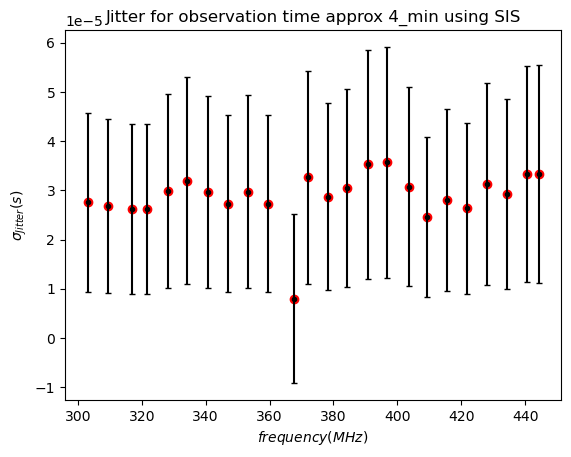

In [151]:
# Plotting
#plotting
# linear regression with error bars
x=channel
y=np.array([np.mean(a) for a in plot_jitter])**0.5
yerror=np.array([(a[1]-a[0])/2 for a in plot_jitter])**0.5
#INPUT PARAMETERS
#dx = 
#dy =  np.array(df2.iloc[:,3])
xlabel = "$frequency (MHz)$"
ylabel = "$\sigma_{Jitter}(s)$"
x1=np.linspace(np.min(x), np.max(x) , 10) # creates array for plotting the line
# defining linear function
def line(x,m,c):
    return (m*x + c)
#var,pcov=curve_fit(line,x,y) # var contains the returned the optimized variables namely m ,c  
#print(np.sqrt(pcov))
#error bars
#xerror=np.full(shape=len(x),fill_value=dx ,)
#yerror=np.full(shape=len(y),fill_value=dy ,)
#plotting the values and error bars
plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')
plt.scatter(x,y,color="r",marker="o")
#plt.plot(x1,line(x1,*var),label= ylabel ,color='green')
#plotting other important elements
#st=str("variables")+str(var)
#st1=str("covariance")+str(pcov)
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.title("Jitter for observation time approx 4_min using SIS")
#plt.figtext(0.20, 0.76, st) # prints the string st at specified coordinates
#plt.figtext(0.20,0.62,st1)
#plt.savefig("10_32_rfi_0.6827_COF.png")
plt.show()

In [11]:
!ls

10_32_rfi.0000_0000  10_32_rfi.0012_0000  10_32_rfi.0024_0000
10_32_rfi.0001_0000  10_32_rfi.0013_0000  10_32_rfi.0025_0000
10_32_rfi.0002_0000  10_32_rfi.0014_0000  10_32_rfi.0026_0000
10_32_rfi.0003_0000  10_32_rfi.0015_0000  10_32_rfi.0027_0000
10_32_rfi.0004_0000  10_32_rfi.0016_0000  10_32_rfi.0028_0000
10_32_rfi.0005_0000  10_32_rfi.0017_0000  10_32_rfi.0029_0000
10_32_rfi.0006_0000  10_32_rfi.0018_0000  10_32_rfi.0030_0000
10_32_rfi.0007_0000  10_32_rfi.0019_0000  10_32_rfi.0031_0000
10_32_rfi.0008_0000  10_32_rfi.0020_0000  residuals.dat
10_32_rfi.0009_0000  10_32_rfi.0021_0000  template
10_32_rfi.0010_0000  10_32_rfi.0022_0000  tim_files
10_32_rfi.0011_0000  10_32_rfi.0023_0000


## plotting from local files

In [152]:
#importing the jitter values saved 
df1=pd.read_csv('../../Analysis4.1/10_32_rfi_files/SIS_10_32_rfi_0.6827.csv')
#df2=pd.read_csv('../Analysis4.1/10_16_rfi_files/10_16_rfi_0.6827.csv')
#df3=pd.read_csv('../Analysis4.1/10_32_rfi_files/10_32_rfi_0.6827.csv')

In [89]:
df1

,Unnamed: 0,mean,error
0,441.038,0.000327,0.000220
1,431.273,0.000286,0.000191
2,418.773,0.000128,0.000088
3,406.765,0.000295,0.000196
4,394.111,0.000148,0.000101
5,381.078,0.000188,0.000132
6,370.866,0.001289,0.000867
7,356.273,0.000297,0.000200
8,343.640,0.000205,0.000137
9,330.947,0.000163,0.000110


In [90]:
df1=df1.drop(6)

In [153]:
J08=(np.mean(df1.iloc[:,1] - df1.iloc[:,2])*m_factor,np.mean(df1.iloc[:,1] + df1.iloc[:,2])*m_factor)

In [140]:
J08

(2.389027436552593e-06, 1.1666581032940175e-05)

In [29]:
J16=(np.mean(df2.iloc[:,1] - df2.iloc[:,2])*m_factor,np.mean(df2.iloc[:,1] + df2.iloc[:,2])*m_factor)

In [30]:
J32=(np.mean(df3.iloc[:,1] - df3.iloc[:,2])*m_factor,np.mean(df3.iloc[:,1] + df3.iloc[:,2])*m_factor)

In [93]:
time_int=psrchive.get_tobs('../../Analysis4.1/10_16_rfi')/10
print('observation time for each subint =',time_int ,'s')

observation time for each subint = 199.96809625600005 s


Scaling to one hour:
$$\sigma_{J}(T_2) = \sigma_{J}(T_1)\sqrt{\frac{T_1}{T_2}}$$

$$T_1 = 199.968 , T_2 = 3600 $$

In [94]:
m_factor=np.sqrt(time_int/3600)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_68828/2321888883.py:7: SyntaxWarning: invalid escape sequence '\s'
  ylabel = "$\sigma_{Jitter}(s)$"


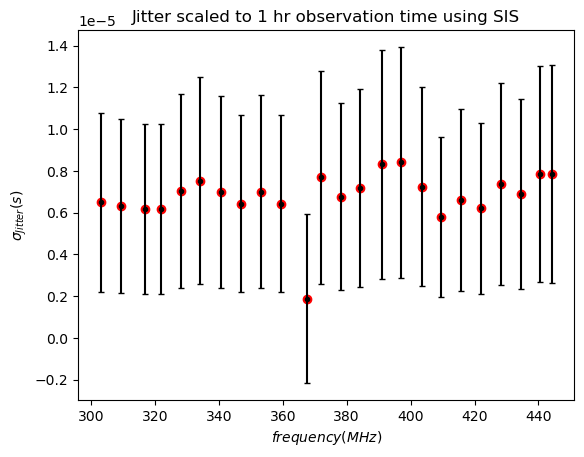

In [155]:
x = df1.iloc[:,0]
y = df1.iloc[:,1]*m_factor
yerror = df1.iloc[:,2]*m_factor


xlabel = "$frequency (MHz)$"
ylabel = "$\sigma_{Jitter}(s)$"

plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')
plt.scatter(x,y,color="r",marker="o")
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.title("Jitter scaled to 1 hr observation time using SIS")
plt.savefig("../../Analysis4.1/SIS_1hour_10_32_rfi_unfiltered.png")
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_9178/3731659293.py:7: SyntaxWarning: invalid escape sequence '\s'
  ylabel = "$\sigma_{Jitter}(s)$"


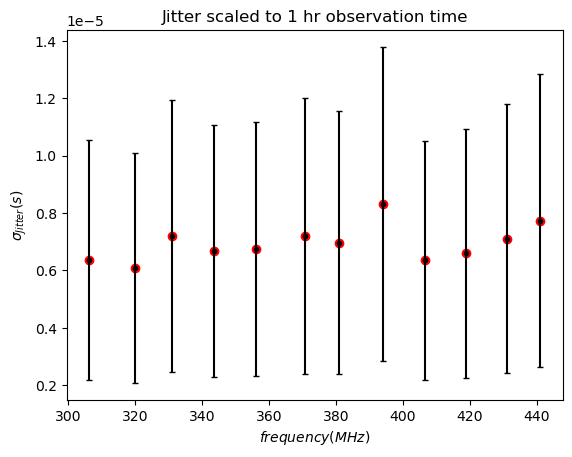

In [11]:
x = df2.iloc[:,0]
y = df2.iloc[:,1]*m_factor
yerror = df2.iloc[:,2]*m_factor


xlabel = "$frequency (MHz)$"
ylabel = "$\sigma_{Jitter}(s)$"

plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')
plt.scatter(x,y,color="r",marker="o")
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.title("Jitter scaled to 1 hr observation time")
#plt.savefig("../Analysis4.1/10_16_rfi.png")
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_9178/3687368294.py:7: SyntaxWarning: invalid escape sequence '\s'
  ylabel = "$\sigma_{Jitter}(s)$"


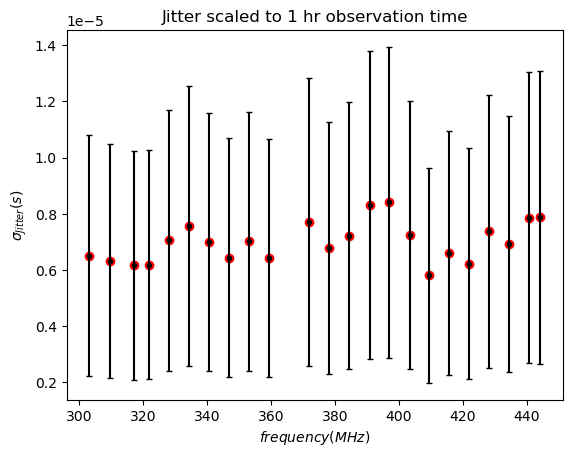

In [12]:
x = df3.iloc[:,0].drop(13)
y = df3.iloc[:,1].drop(13)*m_factor
yerror = df3.iloc[:,2].drop(13)*m_factor


xlabel = "$frequency (MHz)$"
ylabel = "$\sigma_{Jitter}(s)$"

plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')
plt.scatter(x,y,color="r",marker="o")
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.title("Jitter scaled to 1 hr observation time")
#plt.savefig("../Analysis4.1/10_32_rfi.png")
plt.show()

## jitter with time

In [86]:
arch1=psrchive.Archive_load("../Analysis4.1/4_1_rfi")

In [87]:
arch1.get_nsubint()

4

In [88]:
arch1.tscrunch(2)

In [91]:
arch1.get_nchan()

1

In [92]:
# arch1.unload('../Analysis4.1/2_1_rfi')

In [93]:
os.chdir('../Analysis4.1/')

In [104]:
os.makedirs('125_1_rfi_files')

In [110]:
df_list=[df1,df2,df3,df4,df5,df6,df7]

In [111]:
def rms(a):
    return np.sqrt(np.mean([i**2 for i in a]))

In [113]:
len(df1)

250

In [131]:
df1.TOA_error

0      0.000007
1      0.000007
2      0.000004
3      0.000011
4      0.000008
         ...   
245    0.000005
246    0.000007
247    0.000006
248    0.000005
249    0.000006
Name: TOA_error, Length: 250, dtype: float64

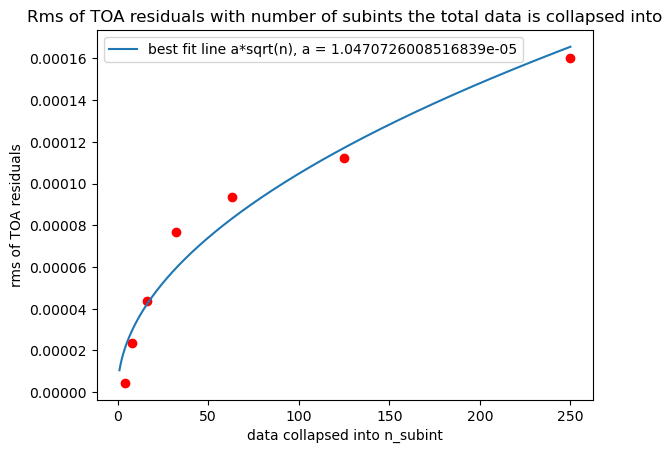

In [137]:




y = np.array([rms(x.residual) for x in df_list])

x = np.array([len(x) for x in df_list])

#yerror = df3.iloc[:,2].drop(13)*m_factor
def rootn(n,a):
    return a*np.sqrt(n)

popt, pcov = curve_fit(rootn, x, y)


x1=np.linspace(1,250,1000)
y1=rootn(x1,popt[0])



xlabel = "data collapsed into n_subint"
ylabel = "rms of TOA residuals"

#plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')

plt.scatter(x,y,color="r",marker="o")
plt.plot(x1,y1,label='best fit line a*sqrt(n), a = '+str(popt[0]))
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()
plt.title("Rms of TOA residuals with number of subints the total data is collapsed into")
plt.savefig("../Analysis4.1/TOA_rms_vs_nsubint.png")
plt.show()

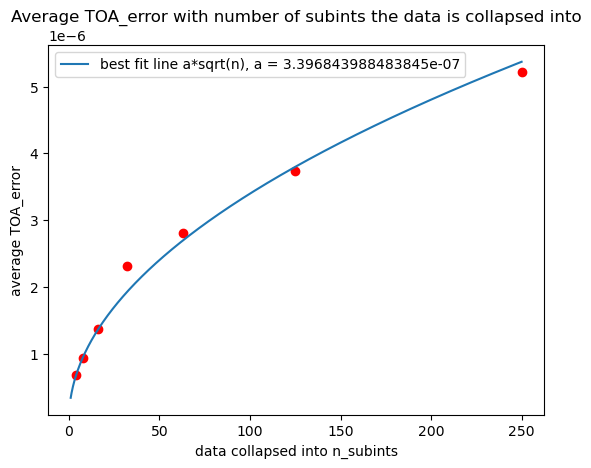

In [138]:
y = np.array([np.mean(x.TOA_error) for x in df_list])

x = np.array([len(x) for x in df_list])

#yerror = df3.iloc[:,2].drop(13)*m_factor

def rootn(n,a):
    return a*np.sqrt(n)

popt, pcov = curve_fit(rootn, x, y)

xlabel = "data collapsed into n_subints"
ylabel = "average TOA_error"


x1=np.linspace(1,250,1000)
y1=rootn(x1,popt[0])


#plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')

plt.scatter(x,y,color="r",marker="o")
plt.plot(x1,y1,label='best fit line a*sqrt(n), a = '+str(popt[0]))
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()
plt.title("Average TOA_error with number of subints the data is collapsed into")
plt.savefig("../Analysis4.1/Average_TOA_error_vs_nsubint.png")
plt.show()

In [117]:
np.array([np.mean(x.TOA_error) for x in df_list])

array([5.22153200e-06, 3.73224000e-06, 2.81296825e-06, 2.30943750e-06,
       1.37062500e-06, 9.35875000e-07, 6.77250000e-07])

## TOA_error statistics

A simple way to test this statistic is to use pat command without splitting and then use tempo2 with nofit and export residuals.dat file.
The sample average of TOA_error column of the so obtained dataframe will give us an estimate of $\sigma_{rad}$ . Doing this for different frequency collapsed files will give us the $\sigma_{rad}$ which will decrease as $\frac{1}{\sqrt{n}}$ .

In [147]:
!ls

10_128_rfi	  1_128_rfi.sm	   250_1_rfi_files
10_128_rfi_files  1_16_rfi	   256_1_rfi
10_128_rfi.tim	  1_16_rfi.sm	   32_1_rfi
10_16_rfi	  1_1_rfi	   32_1_rfi_files
10_16_rfi_files   1_1_rfi.sm	   4_1_rfi
10_16_rfi.png	  125_1_rfi	   4_1_rfi_files
10_16_rfi.tim	  125_1_rfi_files  500_16_rfi
10_2_rfi	  1_2_rfi	   500_1_rfi
10_2_rfi_files	  1_2_rfi.sm	   500_1_rfi_files
10_32_rfi	  1_32_rfi	   500_512_rfi
10_32_rfi_files   1_32_rfi.sm	   500_8_rfi
10_32_rfi.png	  1_512_rfi	   500_8_rfi_files
10_32_rfi.tim	  16_1_rfi	   63_1_rfi
10_512_rfi	  16_1_rfi_files   63_1_rfi_files
10_64_rfi	  1_64_rfi	   8_1_rfi
10_64_rfi_files   1_64_rfi.sm	   8_1_rfi_files
10_64_rfi.tim	  1_8_rfi	   Average_TOA_error_vs_nsubint.png
10_8_rfi	  1_8_rfi.sm	   J1645-0317_long.par
10_8_rfi_files	  2_1_rfi	   TOA_rms_vs_nsubint.png
10_8_rfi.png	  2_1_rfi_files
1_128_rfi	  250_1_rfi


In [149]:
!pat -s 1_4_rfi.sm -f 'tempo2' 10_4_rfi > 10_4_rfi.tim

No archives were specified


In [193]:
df = pd.read_csv('10_8_rfi.tim', sep='\s+',skiprows=1, header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2734/2431970527.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('10_8_rfi.tim', sep='\s+',skiprows=1, header=None)


In [194]:
df.shape

(60, 5)

In [195]:
# Read the text file into a DataFrame
df60 = pd.read_csv('10_8_rfi.tim', sep='\s+',skiprows=1, header=None)
# Rename the columns for clarity
df60.columns = ['Name','Freq','MJD_TOA', 'TOA_error','Telescope']
# Create a dictionary to store the last two columns of each channel
#channels_data = {}

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2734/4164015659.py:2: SyntaxWarning: invalid escape sequence '\s'
  df60 = pd.read_csv('10_8_rfi.tim', sep='\s+',skiprows=1, header=None)


In [197]:
dflist = [df900,df460,df240,df120,df60]

In [260]:
lll=[(np.mean(a.TOA_error),len(a)) for a in dflist]

In [252]:
archive=psrchive.Archive_load('10_32_rfi')

In [253]:
data=archive.get_data()

In [254]:
data.shape

(10, 1, 32, 512)

In [255]:
frequency=data.shape[2]

In [256]:
subint=data.shape[0]

In [241]:
%matplotlib inline

In [ ]:
for a in range(frequency):
    fig2, ax2=plt.subplots()
    ax2.plot(data[5,0,a,:])
    ax2.set_title(str(subint)+'_'+str(frequency)+' ,plot :'+ str(a) )
    ax2.set_xlabel('Pulse phase bin')
    ax2.set_ylabel('Intensity')
    plt.show()
    value=input('Enter nothing/a letter to stop:')
    if len(value) >= 1 or a==frequency-1 :
        break
    else:
        continue

In [218]:
print(type(fdf))

<class 'str'>


In [33]:
lll

NameError: name 'lll' is not defined

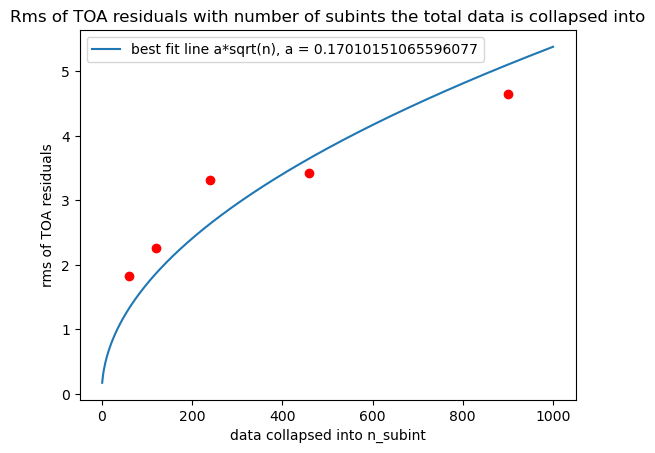

In [264]:
y = [a[0] for a in lll]

x = np.array([a[1] for a in lll])

#yerror = df3.iloc[:,2].drop(13)*m_factor
def rootn(n,a):
    return a*np.sqrt(n)

popt, pcov = curve_fit(rootn, x, y)


x1=np.linspace(1,1000,1000)
y1=rootn(x1,popt[0])



xlabel = "data collapsed into n_subint"
ylabel = "rms of TOA residuals"

#plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')

plt.scatter(x,y,color="r",marker="o")
plt.plot(x1,y1,label='best fit line a*sqrt(n), a = '+str(popt[0]))
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()
plt.title("Rms of TOA residuals with number of subints the total data is collapsed into")
#plt.savefig("../Analysis4.1/TOA_rms_vs_nsubint.png")
plt.show()

In [5]:
%ls

'500|125|63|32|16|8|4|2_1_rfi_residuals.txt'   removing_RFI.ipynb
 bashscr                                       RFI_s.ipynb
 FINAL_Analysis_report.ipynb                   script_test_dir/
 Gupta/                                        tempo2_all_10subints_copy.txt
'New Empty File'*                              Untitled1.ipynb
'NIUS Project Report.ipynb'                    Untitled.ipynb


In [6]:
os.chdir('../Analysis4.1/')

In [7]:
%ls

10_128_rfi         10_8_rfi.tim      2_1_rfi_files/
10_128_rfi_files/  1_128_rfi         250_1_rfi
10_128_rfi.tim     1_128_rfi.sm      250_1_rfi_files/
10_16_rfi          1_16_rfi          256_1_rfi
10_16_rfi_files/   1_16_rfi.sm       32_1_rfi
10_16_rfi.png      1_1_rfi           32_1_rfi_files/
10_16_rfi.tim      1_1_rfi.sm        4_1_rfi
10_2_rfi           125_1_rfi         4_1_rfi_files/
10_2_rfi_files/    125_1_rfi_files/  500_16_rfi
10_32_rfi          1_2_rfi           500_1_rfi
10_32_rfi_files/   1_2_rfi.sm        500_1_rfi_files/
10_32_rfi.png      1_32_rfi          500_512_rfi
10_32_rfi.tim      1_32_rfi.sm       500_8_rfi
10_4_rfi.tim       1_512_rfi         500_8_rfi_files/
10_512_rfi         16_1_rfi          63_1_rfi
10_64_rfi          16_1_rfi_files/   63_1_rfi_files/
10_64_rfi_files/   1_64_rfi          8_1_rfi
10_64_rfi.tim      1_64_rfi.sm       8_1_rfi_files/
10_8_rfi           1_8_rfi           Average_TOA_error_vs_nsubint.png
10_8_rfi_files/    1_8_rfi.sm        J1

In [69]:
arch4=psrchive.Archive_load("10_4_rfi")
arch2=psrchive.Archive_load("10_2_rfi")

Unrecognized telescope code (GMRT)


In [71]:
arch8=psrchive.Archive_load("10_8_rfi")
arch16=psrchive.Archive_load("10_16_rfi")
arch32=psrchive.Archive_load("10_32_rfi")
arch64=psrchive.Archive_load("10_64_rfi")
arch128=psrchive.Archive_load("10_128_rfi")

In [72]:
def SNR(Dataset,Pulse_start_bin,Pulse_end_bin):
    data1=Dataset[0:Pulse_start_bin]
    data2=Dataset[Pulse_start_bin:Pulse_end_bin]
    data3=Dataset[Pulse_end_bin:-1]
    #mean=np.mean([data1,data3])
    #ssr=(1/(512-(Pulse_end_bin-Pulse_start_bin))) *  (np.sum( ) + np.sum( (Dataset[Pulse_start_bin:-1])**2 ) )
    sd=np.std(np.concatenate([data1,data3]))
    signal=np.sum(data2)
    #off_pstd = np.sqrt( ssr )
    #on_pstd = np.sqrt((1/( Pulse_end_bin-Pulse_start_bin) )*np.sum((Dataset[Pulse_start_bin:Pulse_end_bin])**2) )
    #pstd=np.std(Dataset)
    return signal/sd

In [73]:
def SNR(Dataset,Pulse_start_bin,Pulse_end_bin):
    data1=Dataset[0:Pulse_start_bin]
    data2=Dataset[Pulse_start_bin:Pulse_end_bin]
    data3=Dataset[Pulse_end_bin:-1]
    #mean=np.mean([data1,data3])
    #ssr=(1/(512-(Pulse_end_bin-Pulse_start_bin))) *  (np.sum( ) + np.sum( (Dataset[Pulse_start_bin:-1])**2 ) )
    noise_sd_nu=np.std(np.concatenate([data1,data3]))
    noise_mean_nu=np.mean(np.concatenate([data1,data3]))
    signal=np.sum(data2)
    #off_pstd = np.sqrt( ssr )
    #on_pstd = np.sqrt((1/( Pulse_end_bin-Pulse_start_bin) )*np.sum((Dataset[Pulse_start_bin:Pulse_end_bin])**2) )
    #pstd=np.std(Dataset)
    snr=signal/noise_sd_nu
    return [signal,noise_mean_nu,noise_sd_nu,snr]

# a 2-D array frequency chan vs pluse phase bin as second index
def get_dataframe(Data,Pulse_start_bin,Pulse_end_bin):
    stat={}
    for n_chan in range(len(Data)):
        stat[n_chan]=SNR(Data[n_chan],Pulse_start_bin,Pulse_end_bin)
    # Making a data frame from the dictionary to make it easy for manipulation   
    df=pd.DataFrame(stat).T
    df.columns=["signal","noise_mean_nu","noise_sd_nu","snr"]
    return df

# get a dataframe (or a 3d array containing 4-arrays, each being a (2d-arrays of n_subint*n_chan dimension).
#first array as signal, second element as Noise_mean_nu, third element as Noise_sd and fourth element as snr
def get_para(Data,Pulse_start_bin,Pulse_end_bin):
    shape=Data[:,:,0].shape
    signal=np.zeros(shape)
    noise_mean=np.zeros(shape)
    noise_sd=np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            Dataset=Data[i][j]
            par=SNR(Dataset,Pulse_start_bin,Pulse_end_bin)
            signal[i][j]=par[0]
            noise_mean[i][j]=par[1]
            noise_sd[i][j]=par[2]
    snr=signal/noise_sd
    return np.array([signal, noise_mean,noise_sd,snr])

In [74]:
data4=arch4.get_data()[:,0,:,:]
data2=arch2.get_data()[:,0,:,:]

In [75]:
data8=arch8.get_data()[:,0,:,:]

In [76]:
data16=arch16.get_data()[:,0,:,:]
data32=arch32.get_data()[:,0,:,:]
data64=arch64.get_data()[:,0,:,:]
data128=arch128.get_data()[:,0,:,:]

In [15]:
data8.shape

(10, 8, 512)

In [77]:
rad4=get_para(data8,100,260)[2].mean()
rad2=get_para(data8,100,260)[2].mean()

/tmp/ipykernel_11704/1829247742.py:13: RuntimeWarning: invalid value encountered in scalar divide
  snr=signal/noise_sd_nu
/tmp/ipykernel_11704/1829247742.py:40: RuntimeWarning: invalid value encountered in divide
  snr=signal/noise_sd


In [78]:
rad8=get_para(data8,100,260)[2].mean()

/tmp/ipykernel_11704/1829247742.py:13: RuntimeWarning: invalid value encountered in scalar divide
  snr=signal/noise_sd_nu
/tmp/ipykernel_11704/1829247742.py:40: RuntimeWarning: invalid value encountered in divide
  snr=signal/noise_sd


In [36]:
rad8

0.28335422165691854

In [79]:
r2=np.mean(get_para(data2,100,260)[2],where = get_para(data2,100,260)[2]!=0)
r4=np.mean(get_para(data4,100,260)[2],where = get_para(data4,100,260)[2]!=0)
r8=np.mean(get_para(data8,100,260)[2],where = get_para(data8,100,260)[2]!=0)
r16=np.mean(get_para(data16,100,260)[2],where = get_para(data16,100,260)[2]!=0)
r32=np.mean(get_para(data32,100,260)[2],where = get_para(data32,100,260)[2]!=0)
r64=np.mean(get_para(data64,100,260)[2],where = get_para(data64,100,260)[2]!=0)
r128=np.mean(get_para(data128,100,260)[2],where = get_para(data128,100,260)[2]!=0)

/tmp/ipykernel_11704/1829247742.py:13: RuntimeWarning: invalid value encountered in scalar divide
  snr=signal/noise_sd_nu
/tmp/ipykernel_11704/1829247742.py:40: RuntimeWarning: invalid value encountered in divide
  snr=signal/noise_sd


In [22]:
rad16=get_para(data16,100,260)[2].mean()
rad32=get_para(data32,100,260)[2].mean()
rad64=get_para(data64,100,260)[2].mean()
rad128=get_para(data128,100,260)[2].mean()

/tmp/ipykernel_4427/1829247742.py:13: RuntimeWarning: invalid value encountered in scalar divide
  snr=signal/noise_sd_nu
/tmp/ipykernel_4427/1829247742.py:40: RuntimeWarning: invalid value encountered in divide
  snr=signal/noise_sd


In [41]:
r8

0.37780562887589136

In [24]:
rad8

0.28335422165691854

In [42]:
r16/r8

1.4329965254793564

In [32]:
rad16/rad8

1.4329965254793562

In [44]:
r32/r16

1.5092471658073199

In [31]:
rad32/rad16

1.5092471658073199

In [30]:
rad64/rad32

1.2177655060605401

In [29]:
rad128/rad64

1.3271796362821149

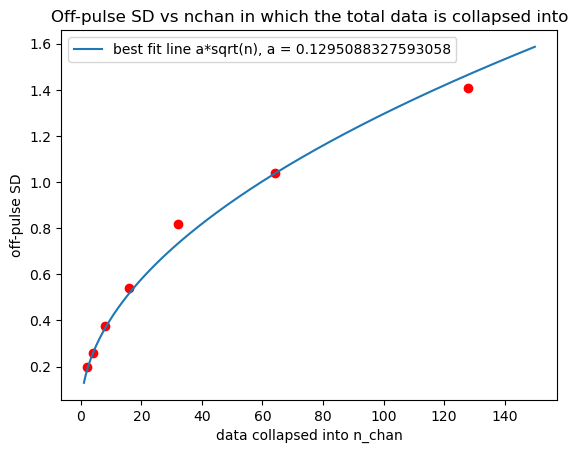

In [84]:
y = [r2,r4,r8 , r16 ,r32 , r64 ,r128]

x = [2,4,8 ,16,32,64,128]

#yerror = df3.iloc[:,2].drop(13)*m_factor
def rootn(n,a):
    return a*np.sqrt(n)

popt, pcov = curve_fit(rootn, x, y)


x1=np.linspace(1,150,1000)
y1=rootn(x1,popt[0])



xlabel = "data collapsed into n_chan"
ylabel = "off-pulse SD"

#plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')

plt.scatter(x,y,color="r",marker="o")
plt.plot(x1,y1,label='best fit line a*sqrt(n), a = '+str(popt[0]))
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()
plt.title("Off-pulse SD vs nchan in which the total data is collapsed into")
plt.savefig("../Analysis4.1/Off-pulse_sd_vs_nchan_for10subints.png")
plt.show()

## Correlation between TOA error and Radiometer noise i.e. off pulse standard deviation

In this section we will want to verify if the pgs algorith is well suited for our analysis or not. A point was raised that pgs algorithm underestimates to radiometer noise or TOA_error.
Since radiometer noise deacreses by $1/\sqrt{N}$, the same should be true for TOA_error if the algorithm estimates it well.

Also the off pulse standard deviation should be strongly correlated with TOA_error generated by the timing algorithm.
One may also chose the algorithm whose correlation with the off-pulse SD is maximum.

### Plotting TOA_error and off-pulse sd as a function of time

In [1]:
!ls

'500|125|63|32|16|8|4|2_1_rfi_residuals.txt'   removing_RFI.ipynb
 bashscr				       RFI_s.ipynb
 FINAL_Analysis_report.ipynb		       script_test_dir
 Gupta					       tempo2_all_10subints_copy.txt
'New Empty File'			       Untitled1.ipynb
'NIUS Project Report.ipynb'		       Untitled.ipynb


In [4]:
# Read the text file into a DataFrame
df = pd.read_csv('../Scripts/500|125|63|32|16|8|4|2_1_rfi_residuals.txt', sep='\s+', header=None)
# Rename the columns for clarity
df.columns = ['MJD_subint', 'residual', 'TOA_error']
# Create a dictionary to store the last two columns of each channel
channels_data = {}

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4952/2257647667.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('../Scripts/500|125|63|32|16|8|4|2_1_rfi_residuals.txt', sep='\s+', header=None)


In [5]:
df.shape

(500, 3)

In [8]:
toa250=df.TOA_error[0:250]
toa125=df.TOA_error[250:375]
toa63=df.TOA_error[375:438]
toa32=df.TOA_error[438:470]
toa16=df.TOA_error[470:486]
toa8=df.TOA_error[486:494]
toa4=df.TOA_error[494:498]
toa2=df.TOA_error[498:500]

In [9]:
array_toa_plot=[toa250.mean(),toa125.mean(),toa63.mean(),toa32.mean(),toa16.mean(),toa8.mean(),toa4.mean(),toa2.mean()]

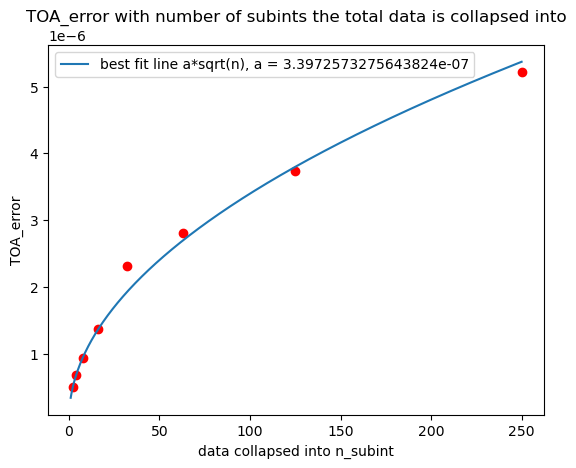

In [12]:
#y = [r8 , r16 ,r32 , r64 ,r128]
y=array_toa_plot
x = [250,125,63,32,16,8,4,2]

#yerror = df3.iloc[:,2].drop(13)*m_factor
def rootn(n,a):
    return a*np.sqrt(n)

popt, pcov = curve_fit(rootn, x, y)


x1=np.linspace(1,250,1000)
y1=rootn(x1,popt[0])



xlabel = "data collapsed into n_subint"
ylabel = "TOA_error"

#plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')

plt.scatter(x,y,color="r",marker="o")
plt.plot(x1,y1,label='best fit line a*sqrt(n), a = '+str(popt[0]))
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()
plt.title("TOA_error with number of subints the total data is collapsed into")
#plt.savefig("../Analysis4.1/TOA_rms_vs_nsubint.png")
plt.show()

The above plot shows a very good fit with the $\sqrt{N}$.
Now we will see how does off-pulse sd behave.

In [15]:
os.chdir("../Analysis4.1/")

In [16]:
arch250=psrchive.Archive_load("250_1_rfi").get_data()[:,0,:,:]
arch125=psrchive.Archive_load("125_1_rfi").get_data()[:,0,:,:]
arch63=psrchive.Archive_load("63_1_rfi").get_data()[:,0,:,:]
arch32=psrchive.Archive_load("32_1_rfi").get_data()[:,0,:,:]
arch16=psrchive.Archive_load("16_1_rfi").get_data()[:,0,:,:]
arch8=psrchive.Archive_load("8_1_rfi").get_data()[:,0,:,:]
arch4=psrchive.Archive_load("4_1_rfi").get_data()[:,0,:,:]
arch2=psrchive.Archive_load("2_1_rfi").get_data()[:,0,:,:]

Unrecognized telescope code (GMRT)


In [21]:
off_pulse250=get_para(arch250,200,260)[2].mean()
off_pulse125=get_para(arch125,200,260)[2].mean()
off_pulse63=get_para(arch63,200,260)[2].mean()
off_pulse32=get_para(arch32,200,260)[2].mean()
off_pulse16=get_para(arch16,200,260)[2].mean()
off_pulse8=get_para(arch8,200,260)[2].mean()
off_pulse4=get_para(arch4,200,260)[2].mean()
off_pulse2=get_para(arch2,200,260)[2].mean()

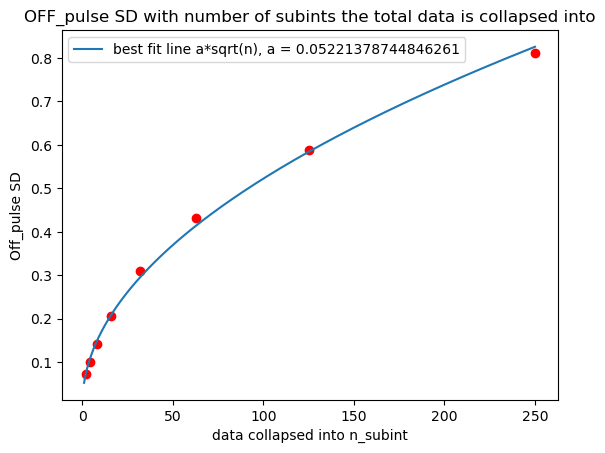

In [186]:
#y = [r8 , r16 ,r32 , r64 ,r128]
y=[off_pulse250,off_pulse125,off_pulse63,off_pulse32,off_pulse16,off_pulse8,off_pulse4,off_pulse2]
x = [250,125,63,32,16,8,4,2]

#yerror = df3.iloc[:,2].drop(13)*m_factor
def rootn(n,a):
    return a*np.sqrt(n)

popt, pcov = curve_fit(rootn, x, y)


x1=np.linspace(1,250,1000)
y1=rootn(x1,popt[0])



xlabel = "data collapsed into n_subint"
ylabel = "Off_pulse SD"

#plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')

plt.scatter(x,y,color="r",marker="o")
plt.plot(x1,y1,label='best fit line a*sqrt(n), a = '+str(popt[0]))
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()
plt.title("OFF_pulse SD with number of subints the total data is collapsed into")
plt.savefig("../Analysis4.1/OFF_pulse_SD_vs_nsubint.png")
plt.show()

This Off-pulse SD is as one expects it to behave.



From above two plots there is one intersting thing to note that the systematic deviation of the points from $\sqrt{N}$ dependence are some for same set of subints, indicating a strong correlataion between TOA_error generated by the PGS algorithm with off_pulse SD i.e. a measure of radiometer noise.

### Other Alogorithms

From previous exerience it was found that various algorithms have different error bars, which can be compared to PGS ,we list them all:
1. PGS :
2. GIS : completely off Very huge Radiometer,noise is way more than Jitter.
3. FDM : comparable (slightly more) to PGS
4. SIS : Almost equal to PGS (slightly less)
5. COF : errors are more than PGS.
6. RVM :
7. ZPS : Very huge error bars
8. PIS : Very huge error bars


Let us try COF, and check if the TOA_error bars follow the same trend as PGS or not. 

#### Generating Jitter files 

#### Generating TOA_error

In [101]:
subint=10
nchan=1
algorith='COF'

In [87]:
channels=[128,64,32,16,8,4,2]

In [9]:
os.chdir('../Analysis4.1/')

In [88]:
for nchan in channels:
    !pat -s 1_1_rfi.sm -A {algorith} -f 'tempo2' {subint}_{nchan}_rfi > {subint}_{nchan}_rfi_{algorith}.tim

Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]


In [177]:
for subint in subints:
    !pat -s 1_1_rfi.sm -A {algorith} -f 'tempo2' {subint}_{nchan}_rfi > {subint}_{nchan}_rfi_{algorith}.tim

Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]
Unrecognized telescope code (GMRT)
* [repeated 2 times]


In [52]:
%ls

 10_128_rfi           2_1_rfi_COF.tim
 10_128_rfi_COF.tim   2_1_rfi_FDM.tim
 10_128_rfi_files/    2_1_rfi_files/
 10_128_rfi.tim       2_1_rfi_GIS.tim
 10_16_rfi            2_1_rfi_PGS.tim
 10_16_rfi_COF.tim    2_1_rfi_SIS.tim
 10_16_rfi_files/    '|250|125|63|32|16|8|4|2_1_COF_tim.txt'
 10_16_rfi.png       '|250|125|63|32|16|8|4|2_1_GIS_tim.txt'
 10_16_rfi.tim        250_1_rfi
 10_2_rfi             250_1_rfi_COF.tim
 10_2_rfi_COF.tim     250_1_rfi_FDM.tim
 10_2_rfi_files/      250_1_rfi_files/
 10_32_rfi            250_1_rfi_GIS.tim
 10_32_rfi_COF.tim    250_1_rfi_PGS.tim
 10_32_rfi_files/     250_1_rfi_SIS.tim
 10_32_rfi.png        256_1_rfi
 10_32_rfi.tim        32_1_rfi
 10_4_rfi             32_1_rfi_COF.tim
 10_4_rfi_COF.tim     32_1_rfi_FDM.tim
 10_4_rfi.tim         32_1_rfi_files/
 10_512_rfi           32_1_rfi_GIS.tim
 10_64_rfi            32_1_rfi_PGS.tim
 10_64_rfi_COF.tim    32_1_rfi_SIS.tim
 10_64_rfi_files/     4_1_rfi
 10_64_rfi.tim        4_1_rfi_COF.tim
 10_8_rfi       

In [53]:
subints=[250,125,63,32,16,8,4,2]

In [89]:
variable=channels

In [90]:
os.path.getsize('10_4_rfi_COF.tim')

1719

In [102]:
df1=pd.DataFrame()
for s in variable:
    if variable==subints:
        name=str(s)+'_'+str(nchan)+'_rfi_'+algorith+'.tim'
    elif variable==channels:
        name=str(subint)+'_'+str(s)+'_rfi_'+algorith+'.tim'
    if os.path.getsize(name) == 0:
        continue
    else:
        df = pd.read_csv(name, sep='\s+',skiprows=1, header=None) 
        df1=pd.concat([df1,df],ignore_index=True)

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_11704/1861429798.py:10: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(name, sep='\s+',skiprows=1, header=None)


In [103]:
df1.columns = ['file_name','frequency','MJD_TOA', 'TOA_error','telescope']

In [104]:
df128=df1[df1.file_name=='10_128_rfi']
df64=df1[df1.file_name=='10_64_rfi']
df32=df1[df1.file_name=='10_32_rfi']
df16=df1[df1.file_name=='10_16_rfi']
df8=df1[df1.file_name=='10_8_rfi']
df4=df1[df1.file_name=='10_4_rfi']
df2=df1[df1.file_name=='10_2_rfi']

In [105]:
list_plot=[df128.TOA_error.mean(),df64.TOA_error.mean(),df32.TOA_error.mean(),df16.TOA_error.mean(),df8.TOA_error.mean(),df4.TOA_error.mean(),df2.TOA_error.mean()]

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_11704/1914510948.py:21: SyntaxWarning: invalid escape sequence '\m'
  ylabel = "TOA_error ($\mu$s)"


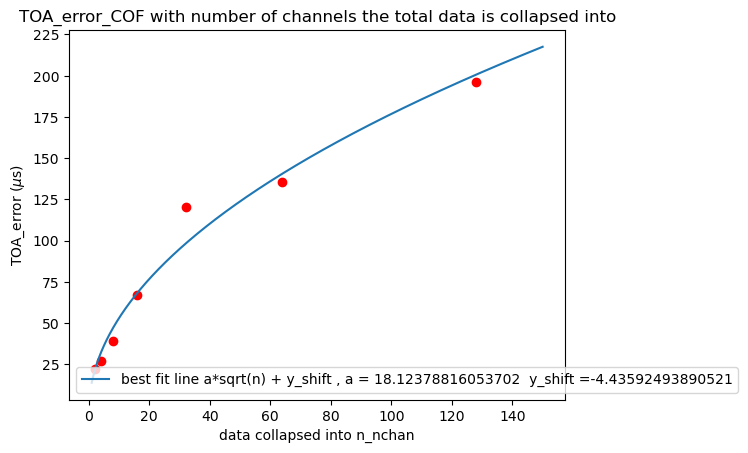

In [106]:
# different fitting with a vertical shift

y=list_plot
x = [128,64,32,16,8,4,2]

#yerror = df3.iloc[:,2].drop(13)*m_factor
def rootn(n,a):
    return a*np.sqrt(n)
def rootn_shift(n,a,y_shift):
    return a*np.sqrt(n) + y_shift

popt, pcov = curve_fit(rootn, x, y)
popt1,pcov1 = curve_fit(rootn_shift,x,y)

x1=np.linspace(1,150,1000)
y1=rootn(x1,popt[0])
y2=rootn_shift(x1,popt1[0],popt1[1])


xlabel = "data collapsed into n_nchan"
ylabel = "TOA_error ($\mu$s)"

#plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')

plt.scatter(x,y,color="r",marker="o")
plt.plot(x1,y2,label='best fit line a*sqrt(n) + y_shift , a = '+str(popt1[0]) + '  y_shift =' + str(popt1[1]) )
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()
plt.title("TOA_error_COF with number of channels the total data is collapsed into")
#plt.savefig("../Analysis4.1/TOA_error_PGS_vs_nchan_for10subints_fit2.png")
plt.show()

In [98]:
popt1

array([0.31492916, 1.08917961])

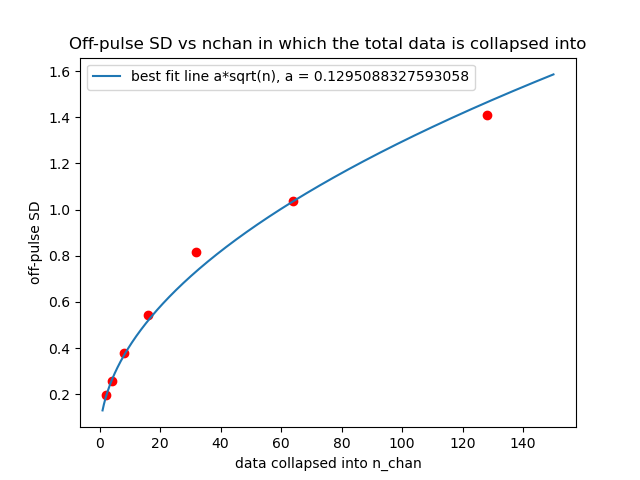

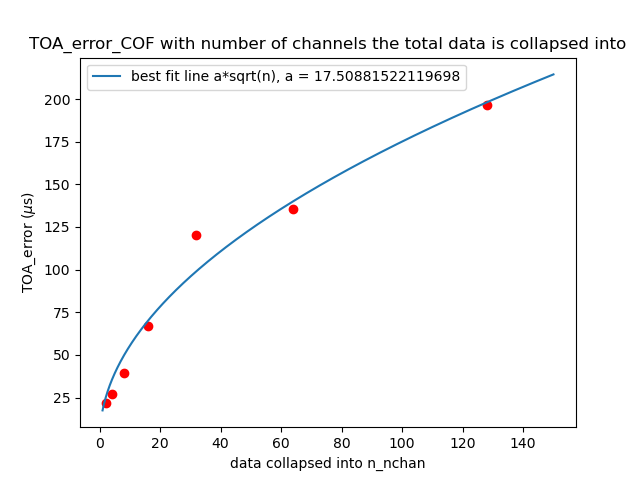

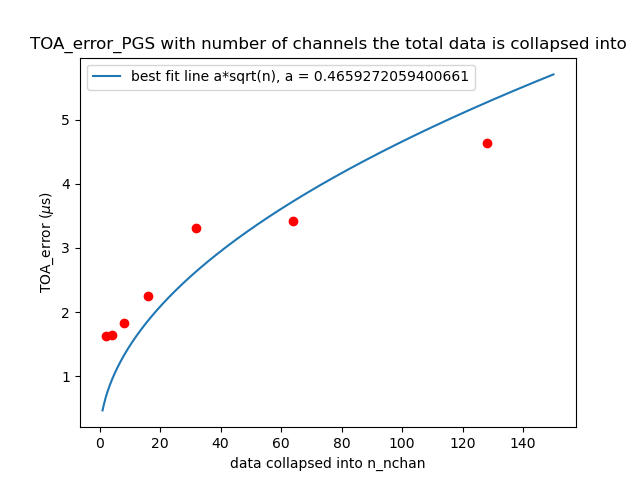

In [181]:
df1.columns=['file_name','frequency','MJD_TOA', 'TOA_error','telescope']
df=df1

In [182]:
toa250=df.TOA_error[0:250]
toa125=df.TOA_error[250:375]
toa63=df.TOA_error[375:438]
toa32=df.TOA_error[438:470]
toa16=df.TOA_error[470:486]
toa8=df.TOA_error[486:494]
toa4=df.TOA_error[494:498]
toa2=df.TOA_error[498:500]

In [183]:
array_toa_plot=[toa250.mean(),toa125.mean(),toa63.mean(),toa32.mean(),toa16.mean(),toa8.mean(),toa4.mean(),toa2.mean()]

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4952/3927624944.py:18: SyntaxWarning: invalid escape sequence '\m'
  ylabel = "TOA_error ($\mu$s)"


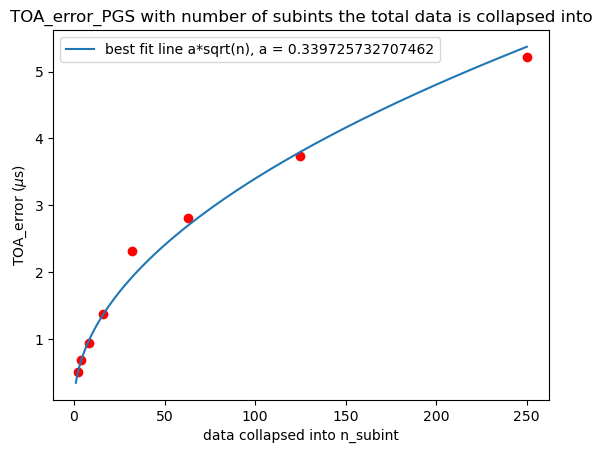

In [185]:
#y = [r8 , r16 ,r32 , r64 ,r128]
y=array_toa_plot
x = [250,125,63,32,16,8,4,2]

#yerror = df3.iloc[:,2].drop(13)*m_factor
def rootn(n,a):
    return a*np.sqrt(n)

popt, pcov = curve_fit(rootn, x, y)


x1=np.linspace(1,250,1000)
y1=rootn(x1,popt[0])



xlabel = "data collapsed into n_subint"
ylabel = "TOA_error ($\mu$s)"

#plt.errorbar(x, y,yerr = yerror,fmt ='.',capsize=2,color='black')

plt.scatter(x,y,color="r",marker="o")
plt.plot(x1,y1,label='best fit line a*sqrt(n), a = '+str(popt[0]))
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()
plt.title("TOA_error_PGS with number of subints the total data is collapsed into")
#plt.savefig("../Analysis4.1/TOA_error_PGS_vs_nsubint.png")
plt.show()

In [ ]:
# Try plotting medain TOA_erro instead of mean  and check if there is an imporovement in the process

### Correlation between TOA_error and OFF-pulse rms for different timing algorithms

### Commparing

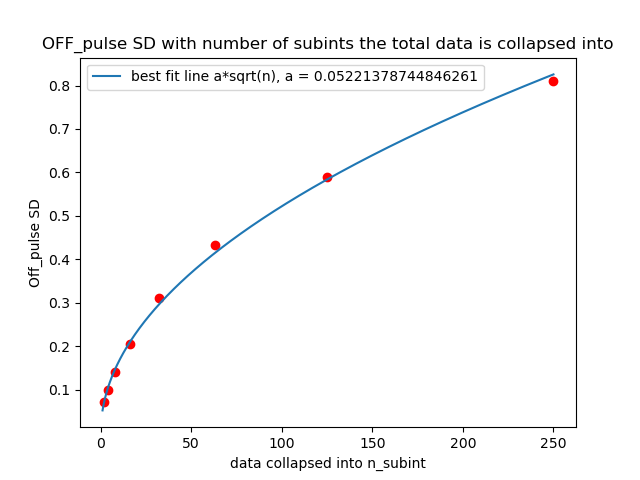

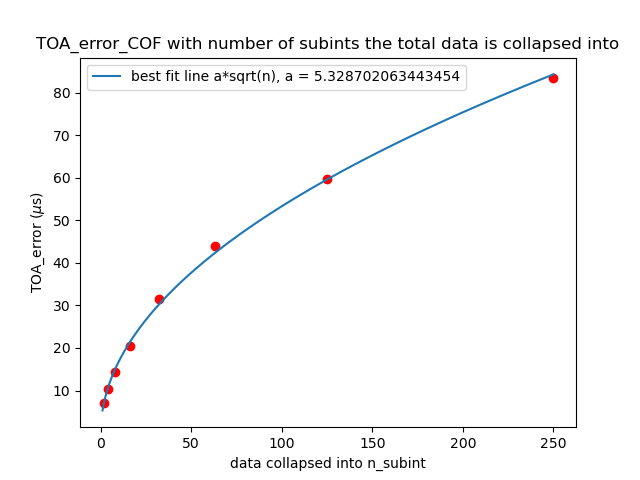

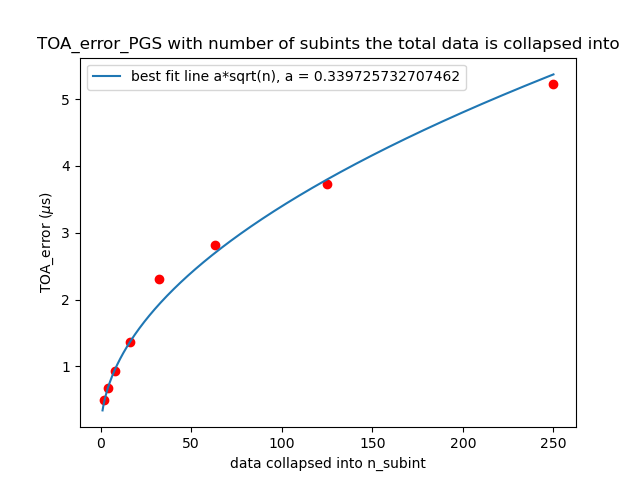

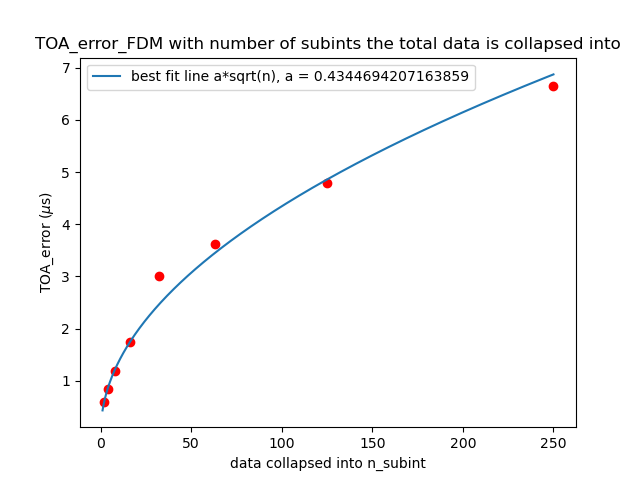

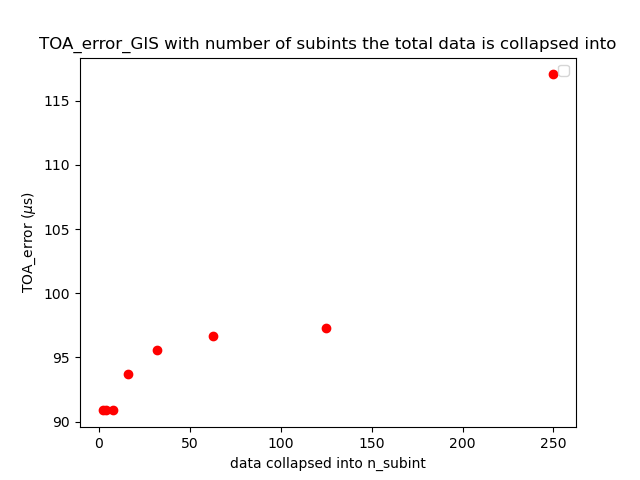

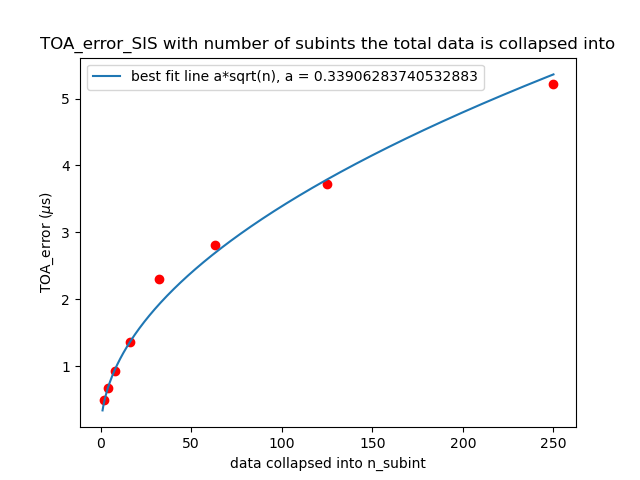